<b><h2><center>Thera Bank - Credit Card Users Churn Prediction (Machine Learning Model)</center></h2></b>

<center><img src="https://drive.google.com/uc?export=view&id=1_CeyfsgMWJt0tDBeevnGIGQkfwDIhu-W" width="800" height="400"></center>
<center>
*Above image created using a custom prompt in generative AI (ChatGPT 4)*
</center>

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier, plot_importance

# Libraries to tune different models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Libraries to get different metric scores
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer)

# libraries to import Imblearn for over-sampling and under-sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Command to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import and mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [ ]:
credit_card_churn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PGP-AIML/Advanced Machine Learning/Credit_Card_Users_Churn_Prediction/Full_Code_Version/BankChurners.csv")

## Data Overview

In [ ]:
# Display first 5 rows in the dataframe
credit_card_churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Display shape of our dataframe
credit_card_churn.shape

(10127, 21)

In [ ]:
# Display sample of 10 rows in the dataframe
credit_card_churn.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1596,717999183,Existing Customer,36,M,3,High School,Married,$60K - $80K,Blue,36,...,3,3,4108.0,1659,2449.0,1.202,2275,58,0.871,0.404
2926,713687508,Existing Customer,59,M,1,Doctorate,Single,$60K - $80K,Blue,49,...,2,4,9944.0,1606,8338.0,0.620,3159,69,0.568,0.162
7675,715122858,Existing Customer,55,F,2,Graduate,Married,$40K - $60K,Blue,36,...,3,3,2653.0,0,2653.0,0.969,5052,81,0.761,0.000
5451,827423433,Existing Customer,41,F,4,Graduate,Divorced,Less than $40K,Blue,37,...,1,4,7492.0,1399,6093.0,0.533,3668,67,0.675,0.187
4798,716580933,Existing Customer,63,M,0,Uneducated,Single,$40K - $60K,Blue,36,...,3,3,1970.0,1224,746.0,0.540,4533,65,0.625,0.621
4792,718005108,Existing Customer,44,F,5,College,Married,Less than $40K,Blue,34,...,1,2,2096.0,1711,385.0,0.746,3692,68,0.744,0.816
2816,719234883,Existing Customer,57,M,3,Graduate,Single,$120K +,Blue,49,...,3,3,32676.0,2134,30542.0,0.797,3990,88,0.760,0.065
7564,771163533,Existing Customer,52,F,1,NaN,Married,$40K - $60K,Blue,39,...,2,1,1438.3,635,803.3,0.744,4617,79,0.927,0.441
9395,756371058,Existing Customer,58,F,1,NaN,Married,Less than $40K,Blue,40,...,2,3,3944.0,1006,2938.0,0.782,15315,124,0.851,0.255
5154,710744433,Existing Customer,48,F,1,Uneducated,Single,Less than $40K,Blue,38,...,2,0,2578.0,2424,154.0,0.517,4077,78,0.625,0.940


In [ ]:
# Display a concise summary of the datatypes in the dataframe
credit_card_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Observations:
* We mostly have numeric data types (integers and floats).
* We also have 6 object types that we may want to convert to another types for our model to work optimally.

In [ ]:
# We will convert 6 object types (Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category) to categorical variables
for feature in credit_card_churn.columns: # Loop through all columns in the dataframe
    if credit_card_churn[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_card_churn[feature] = pd.Categorical(credit_card_churn[feature])# Replace strings with an integer
credit_card_churn.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
# Confirm object data types have been converted to category data types
credit_card_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [ ]:
# Display a statistical summary of features in our dataframe
credit_card_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [ ]:
# Check for missing values
credit_card_churn.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Observations:
* We have two features that are missing a significant amount of data.
* Education_Level is missing 1519 values.
* Marital_Status is missing 749 values.

Sanity checks:
* Initial examination of sample rows and columns shows that the dataset loaded correctly.
* Descriptive statistics have been computed correctly for the numeric columns.
* The target varible, Attrition_Flag is present.

In [ ]:
# We can drop CLIENTNUM feature as this will not have any predictive power in the model
credit_card_churn = credit_card_churn.drop("CLIENTNUM", axis=1)

In [ ]:
# Confirm we have dropped CLIENTNUM feature
credit_card_churn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


* We have dropped the CLIENTNUM feature as this will not have any predictive power in the model.

In [ ]:
print(credit_card_churn.Attrition_Flag.value_counts())
print(credit_card_churn.Customer_Age.value_counts())
print(credit_card_churn.Gender.value_counts())
print(credit_card_churn.Dependent_count.value_counts())
print(credit_card_churn.Education_Level.value_counts())
print(credit_card_churn.Marital_Status.value_counts())
print(credit_card_churn.Income_Category.value_counts())
print(credit_card_churn.Card_Category.value_counts())
print(credit_card_churn.Months_on_book.value_counts())
print(credit_card_churn.Total_Relationship_Count.value_counts())
print(credit_card_churn.Months_Inactive_12_mon.value_counts())
print(credit_card_churn.Contacts_Count_12_mon.value_counts())
print(credit_card_churn.Credit_Limit.value_counts())
print(credit_card_churn.Total_Revolving_Bal.value_counts())
print(credit_card_churn.Avg_Open_To_Buy.value_counts())
print(credit_card_churn.Total_Amt_Chng_Q4_Q1.value_counts())
print(credit_card_churn.Total_Trans_Amt.value_counts())
print(credit_card_churn.Total_Trans_Ct.value_counts())
print(credit_card_churn.Total_Ct_Chng_Q4_Q1.value_counts())
print(credit_card_churn.Avg_Utilization_Ratio.value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60

* We can see from the above listing the breakdown of value counts within each feature.

In [ ]:
# Check for missing values
credit_card_churn.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* We have missing values for Education_Level and Marital_Status, and we will handle those later but before building our models.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Age Analysis

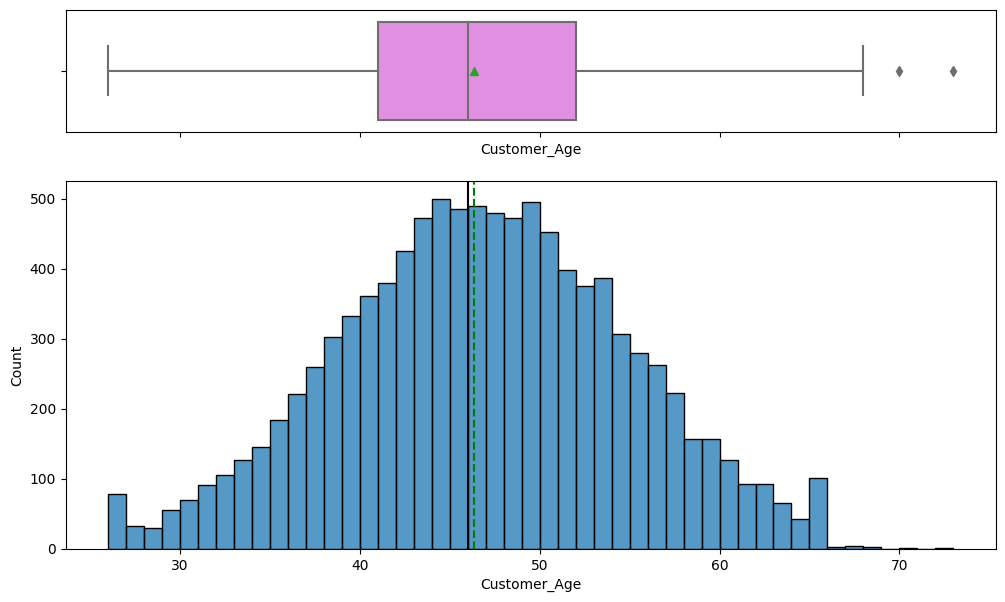

In [ ]:
# Display boxplot and histogram of Customer Age
histogram_boxplot(credit_card_churn, 'Customer_Age')

* Age is normally distributed.

#### Dependent Count Analysis

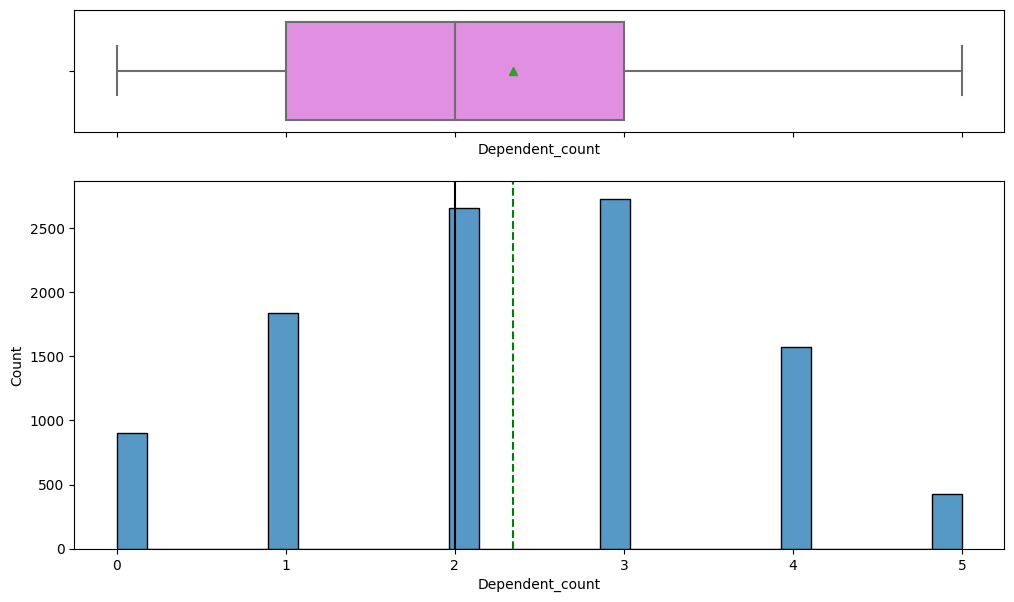

In [ ]:
# Display boxplot and histogram of Dependent Count
histogram_boxplot(credit_card_churn, 'Dependent_count')

* Number of depedents is normally distributed, and the median number of dependents is two.

#### Months On Book Analysis

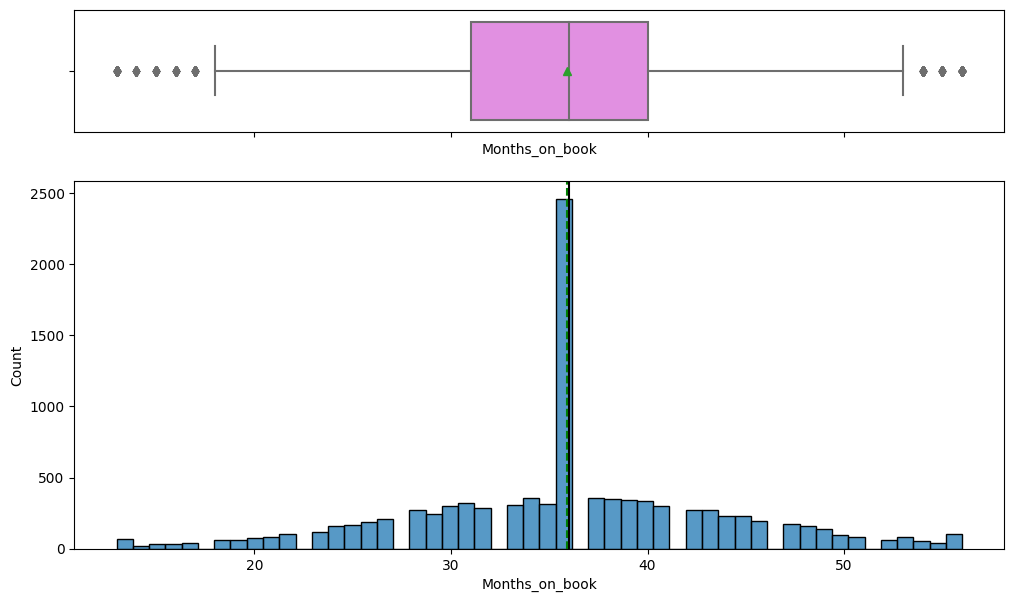

In [ ]:
# Display boxplot and histogram of Months on Book
histogram_boxplot(credit_card_churn, 'Months_on_book')

* The Months_on_book feaature is normally distributed.
* Most customers have had a relationship with the bank for about 36 months (3 years).

#### Total Relationship Count Analysis

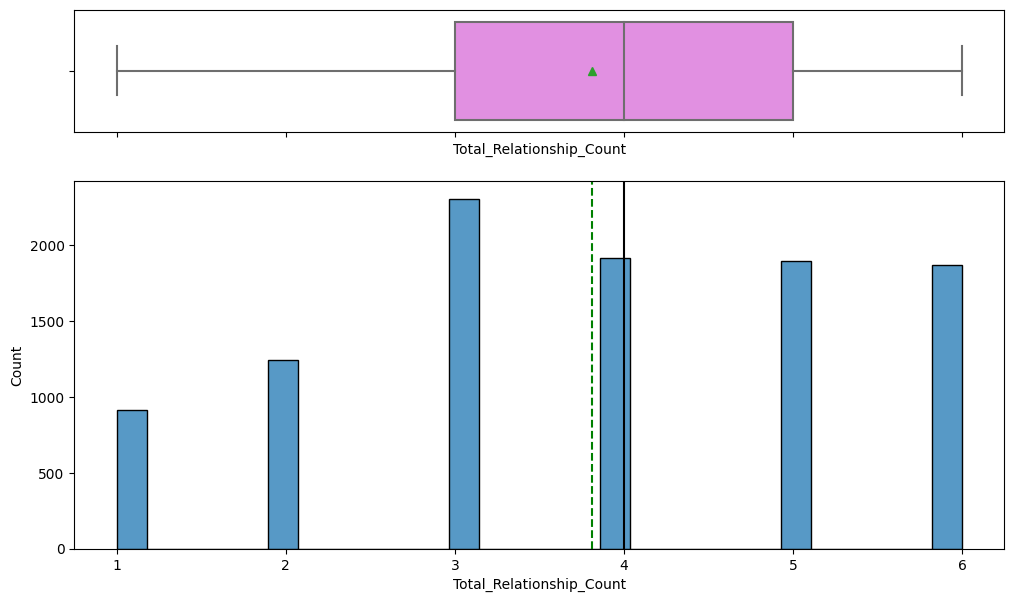

In [ ]:
# Display boxplot and histogram of Total Relationship Count
histogram_boxplot(credit_card_churn, 'Total_Relationship_Count')

* The total number of products held by the customer is approximately four.

#### Months Inactive 12 Months Analysis

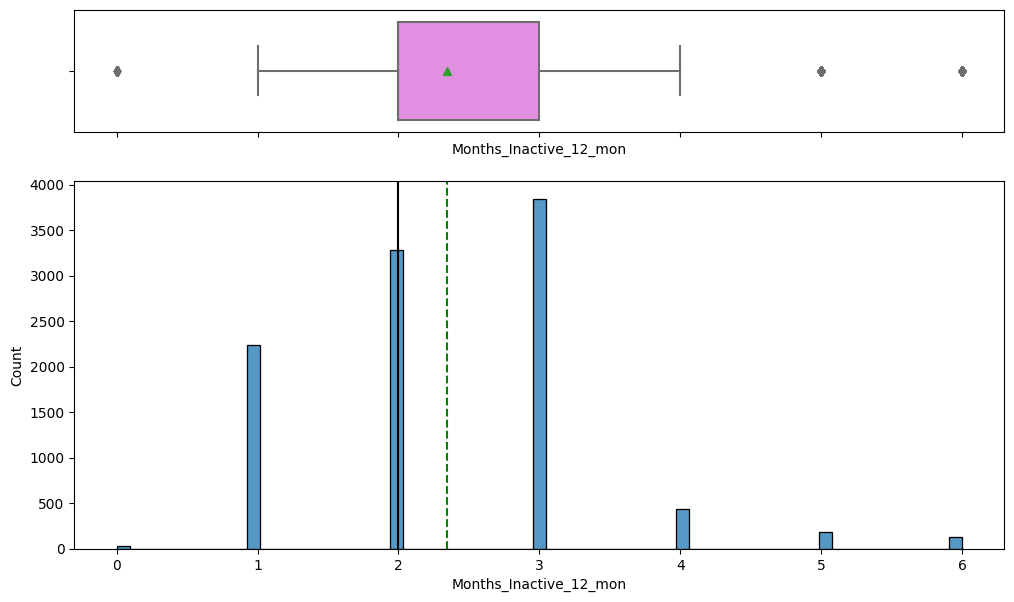

In [ ]:
# Display boxplot and histogram of Months Inactive over the last 12 months
histogram_boxplot(credit_card_churn, 'Months_Inactive_12_mon')

* The number of months a customer has been inactive in the last 12 months is between two and three months.

#### Contacts Count 12 Months Analysis

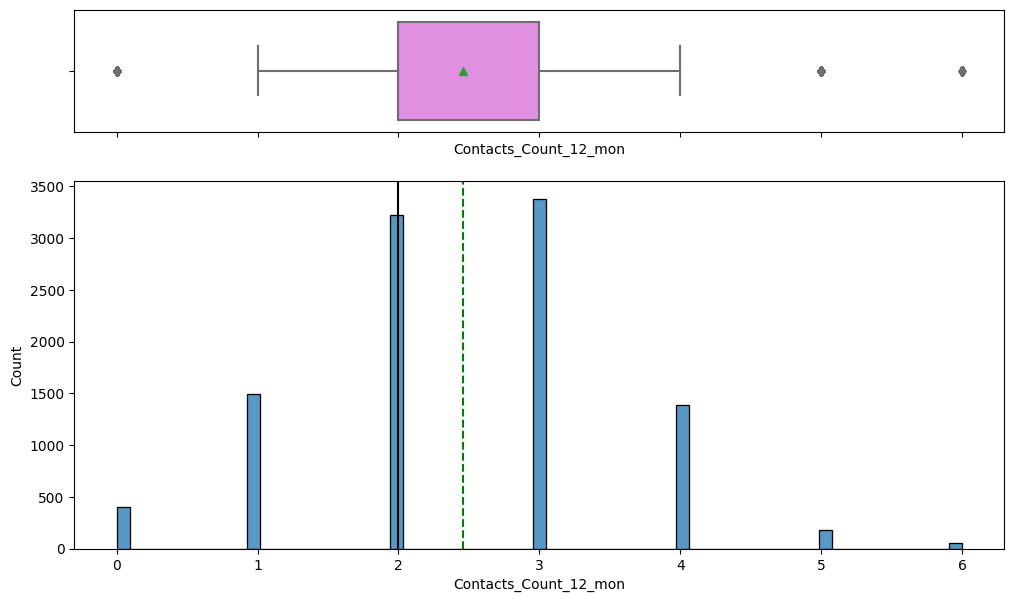

In [ ]:
# Display boxplot and histogram of Contacts Count over the last 12 months
histogram_boxplot(credit_card_churn, 'Contacts_Count_12_mon')

* The number of contacts between the customer and bank in the last 12 months is between two and three contacts.

#### Credit Limit Analysis

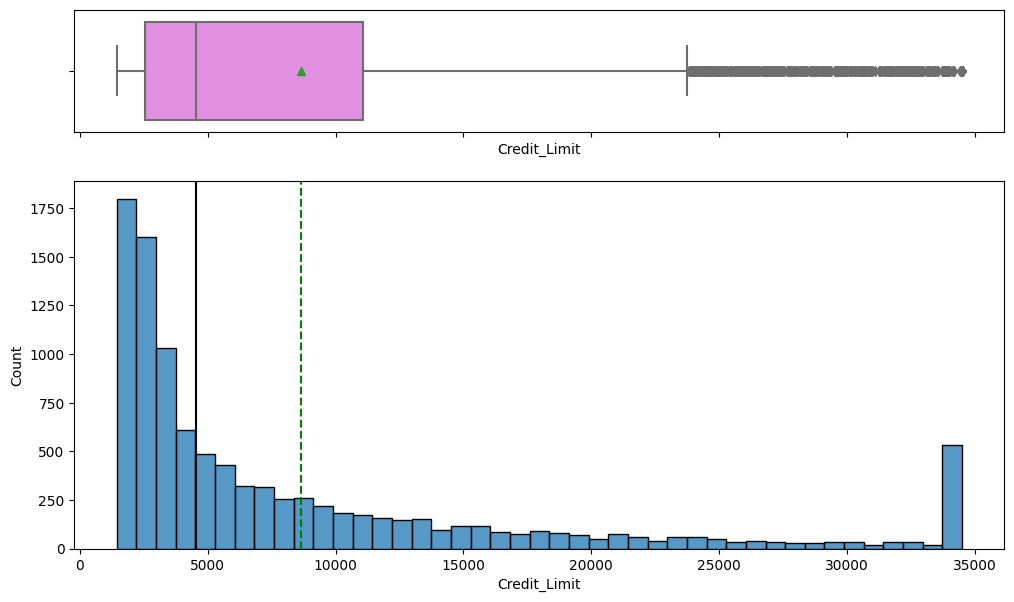

In [ ]:
# Display boxplot and histogram of Credit Limit
histogram_boxplot(credit_card_churn, 'Credit_Limit')

* The credit card credit limit distribution is right-skewed.
* The credit limit on the credit card averages between 8,000 - 9,000 dollars.

#### Total Revolving Balance Analysis

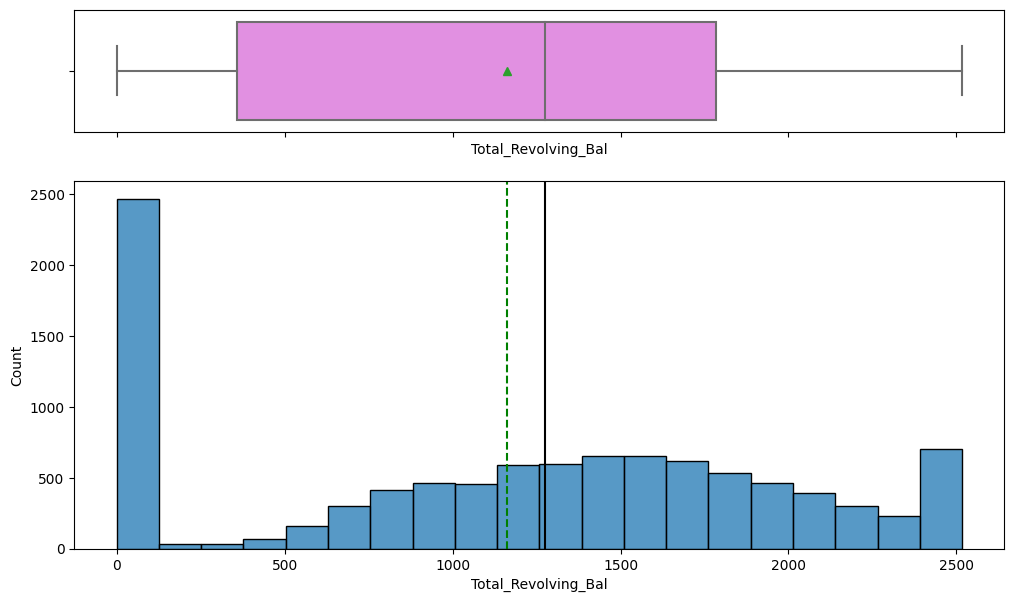

In [ ]:
# Display boxplot and histogram of Total Revolving Balance
histogram_boxplot(credit_card_churn, 'Total_Revolving_Bal')

* The balance that carries over from one month to the next is the revolving balance and the average balance is approximately 1100 dollars.

#### Avg Open To Buy Analysis

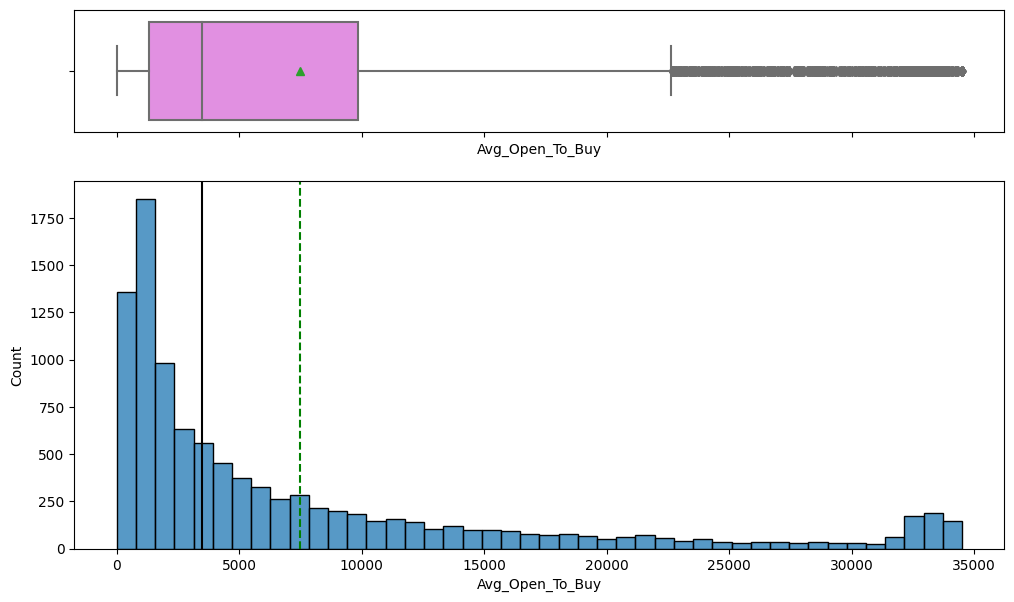

In [ ]:
# Display boxplot and histogram of the Average Open to Buy amount in the last 12 months
histogram_boxplot(credit_card_churn, 'Avg_Open_To_Buy')

* The amount left on the credit card to use (Average of last 12 months) is on average about 7500 dollars.

#### Total Amount Change Q4 to Q1 Analysis

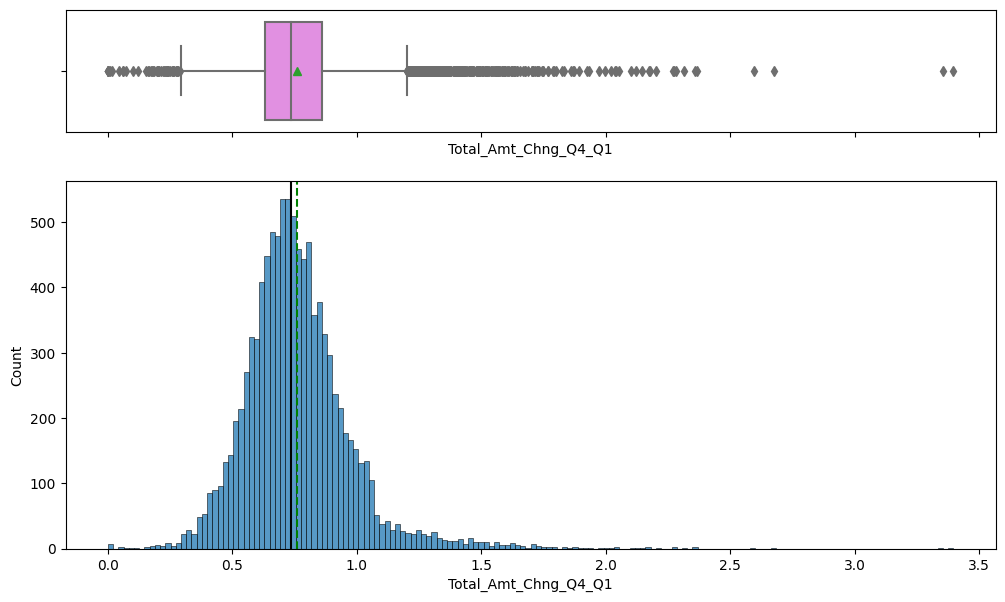

In [ ]:
# Display boxplot and histogram of Total Amount Change from Q4 to Q1
histogram_boxplot(credit_card_churn, 'Total_Amt_Chng_Q4_Q1')

* The Total_Amt_Chng_Q4_Q1 feature is normally distributed.
* The ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter is on average about 0.75.

#### Total Transaction Amount Analysis

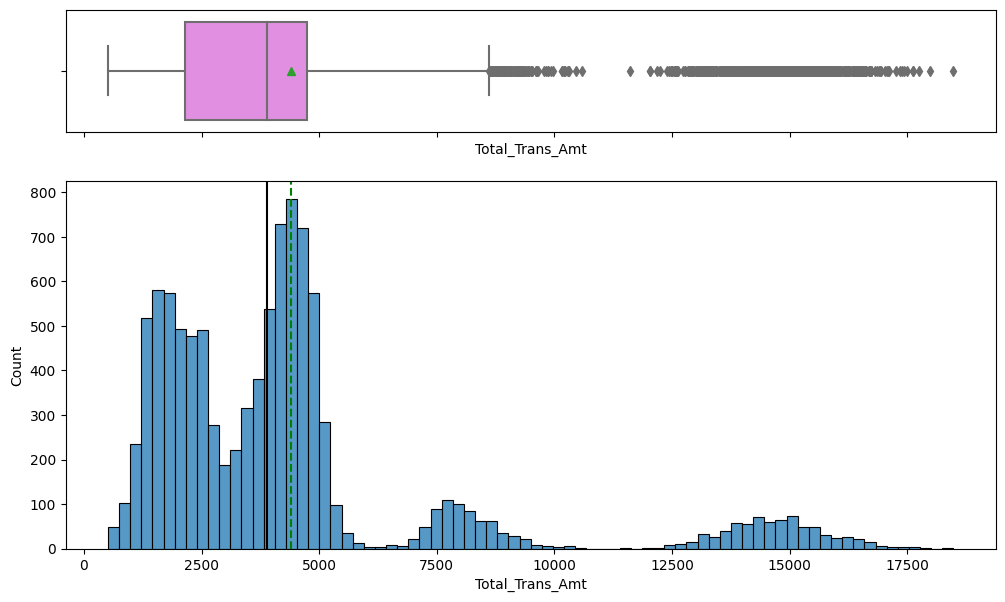

In [ ]:
# Display boxplot and histogram of Total Transaction Amount in the last 12 months
histogram_boxplot(credit_card_churn, 'Total_Trans_Amt')

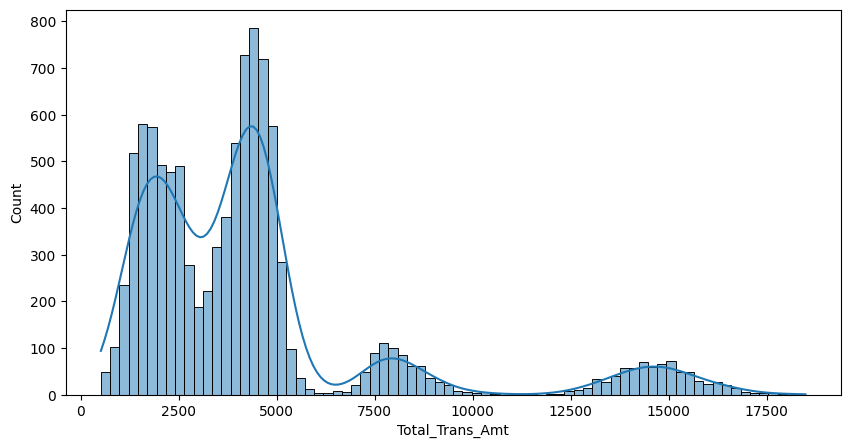

In [ ]:
# Display histplot of the Total Transaction Amount in the last 12 months
plt.figure(figsize=(10,5))
sns.histplot(credit_card_churn, x='Total_Trans_Amt', kde=True)
plt.show()

* The total transaction amount (Last 12 months) has a lot of outliers and the average amount is $4404.08.
* Total transaction amount distribution is right-skewed with multiple multiple peaks, or multiple modes.

#### Total Transaction Count Analysis

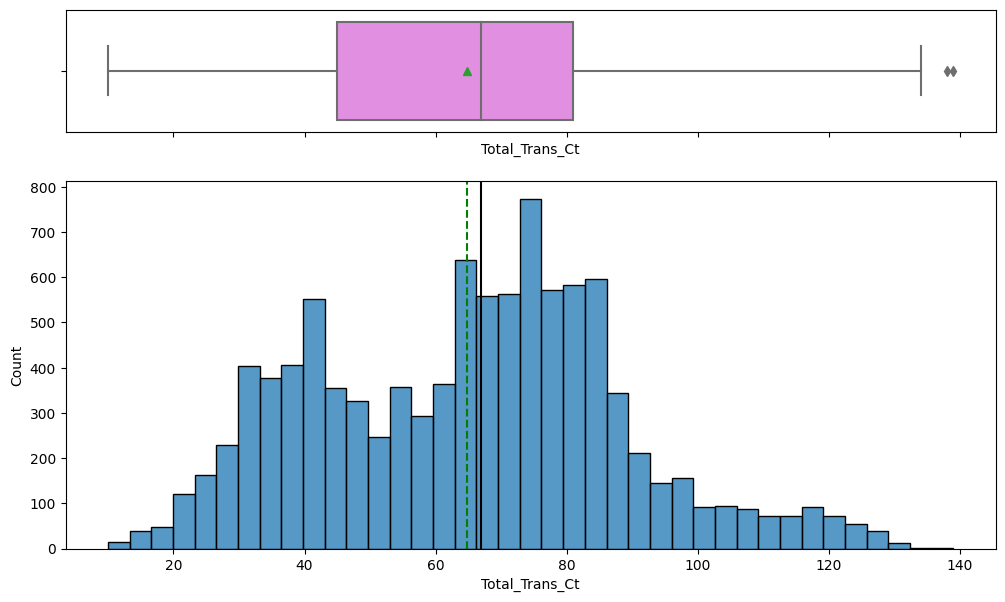

In [ ]:
# Display boxplot and histogram of Total Transaction Count in last 12 months
histogram_boxplot(credit_card_churn, 'Total_Trans_Ct')

* The total transaction count (last 12 months) averages about 65 transactions.

#### Total Count Change Q4 to Q1 Analysis

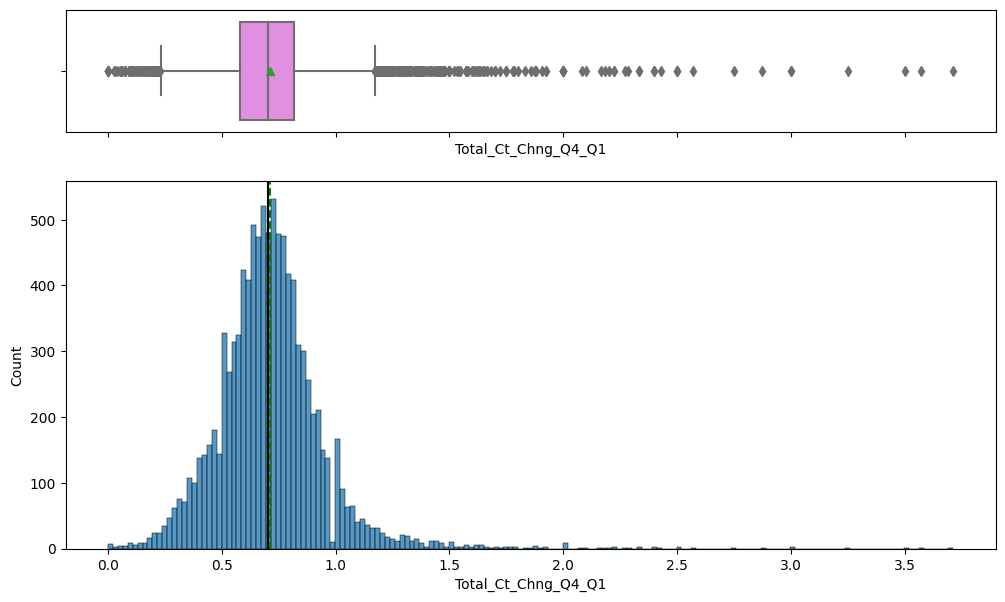

In [ ]:
# Display boxplot and histogram of Total Count Change Q4 to Q1
histogram_boxplot(credit_card_churn, 'Total_Ct_Chng_Q4_Q1')

* The ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter is normally distributed.
* The ratio is about 0.70.

#### Average Utilization Ratio Analysis

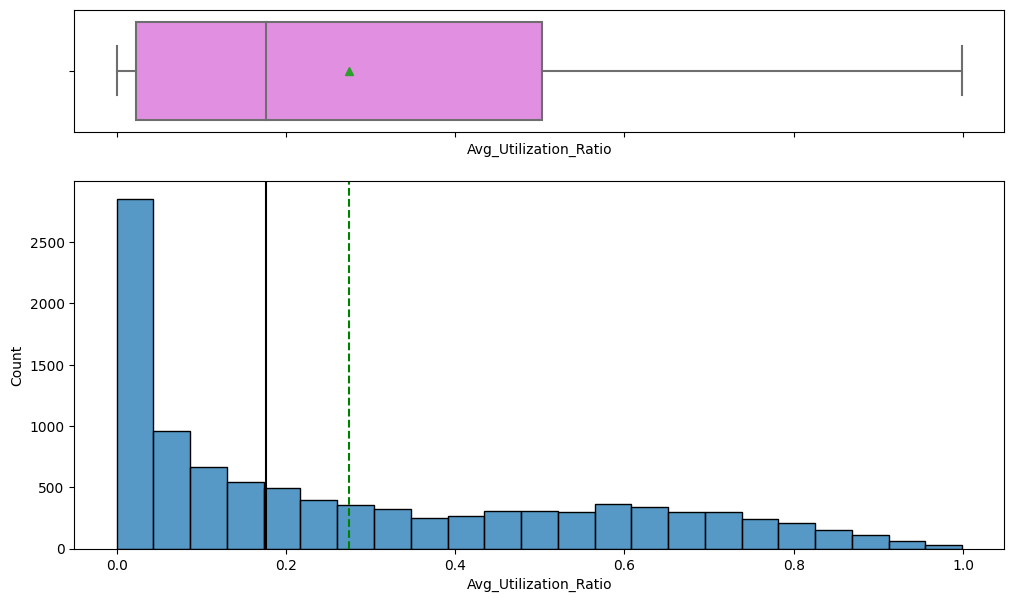

In [ ]:
# Display boxplot and histogram of Avg Utilization Ratio
histogram_boxplot(credit_card_churn, 'Avg_Utilization_Ratio')

*  The average utilization ratio, how much of the available credit the customer spent, is about 0.30.

#### Attrition Flag Analysis

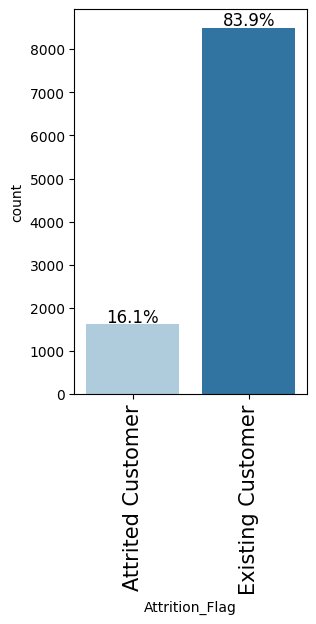

In [ ]:
# Display labeled barplot of Attrition Flag
labeled_barplot(credit_card_churn, "Attrition_Flag", perc=True)

* Attrition analysis shows that 16.1% of customers in the dataset have left the bank.

#### Education Level Analysis

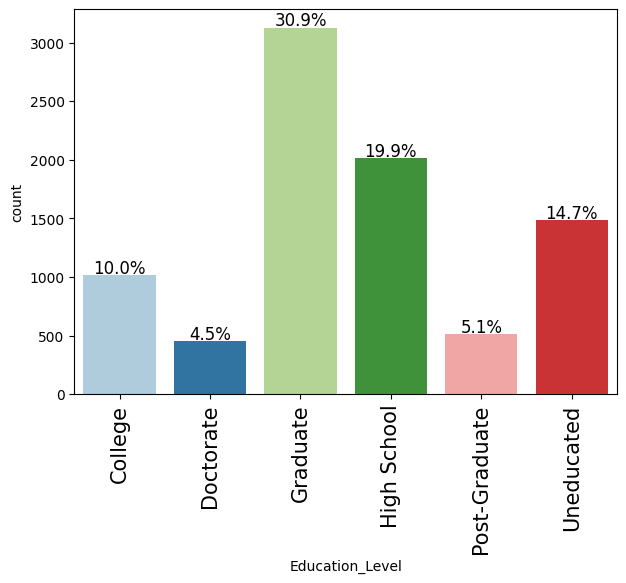

In [ ]:
# Display labled barplot of Education Level
labeled_barplot(credit_card_churn, "Education_Level", perc=True)

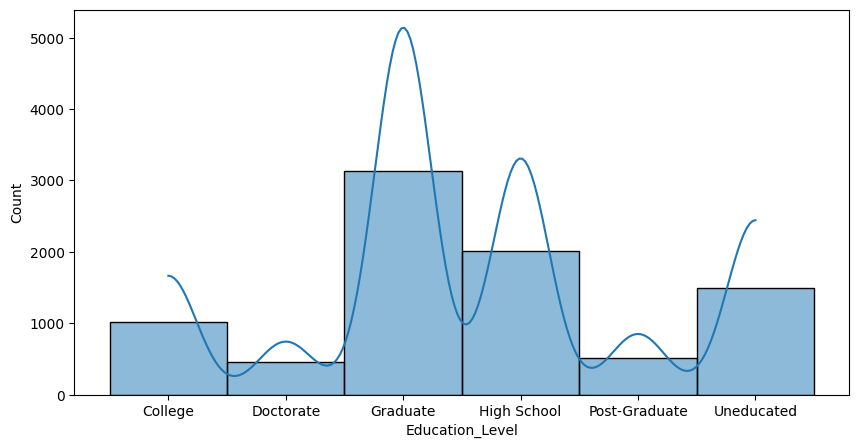

In [ ]:
# Display hisplot of the Education Level
plt.figure(figsize=(10,5))
sns.histplot(credit_card_churn, x='Education_Level', kde=True)
plt.show()

* Graduate level education accounts for 30.9 % of the education level of customers in our dataset, followed by high shool (19.9%), and uneducated (14.7%).
* Education level has multiple peaks so it is not uniformly distributed.

#### Marital Status Analysis

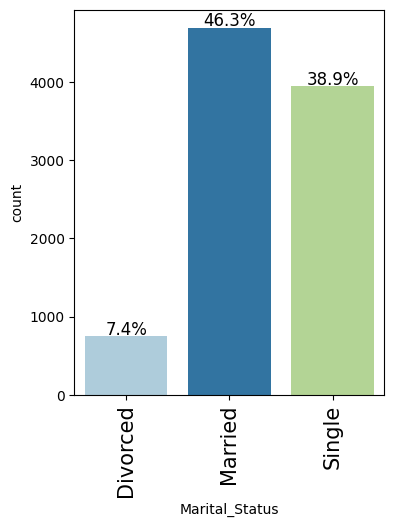

In [ ]:
# Display labeled barplot of Marital Status
labeled_barplot(credit_card_churn, "Marital_Status", perc=True)

* The majority of credit card customers are married (46.3%), followed by single (38.9%), and then divorced (7.4%).

#### Income Category Analysis

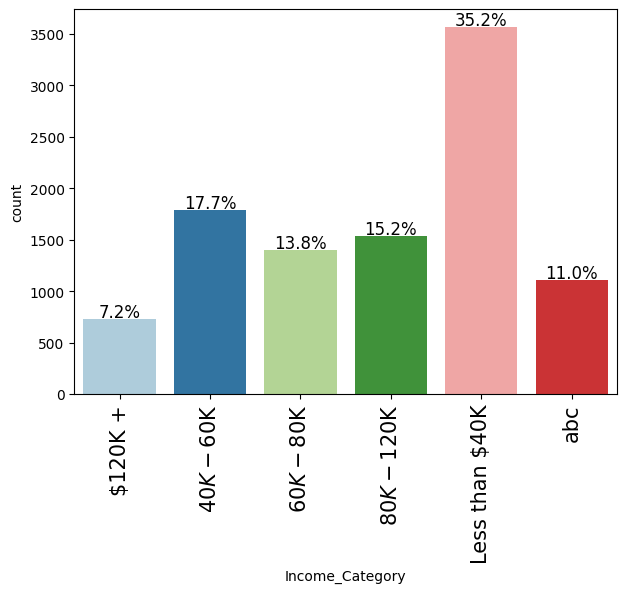

In [ ]:
# Display labeled barplot of Income Category
labeled_barplot(credit_card_churn, "Income_Category", perc=True)

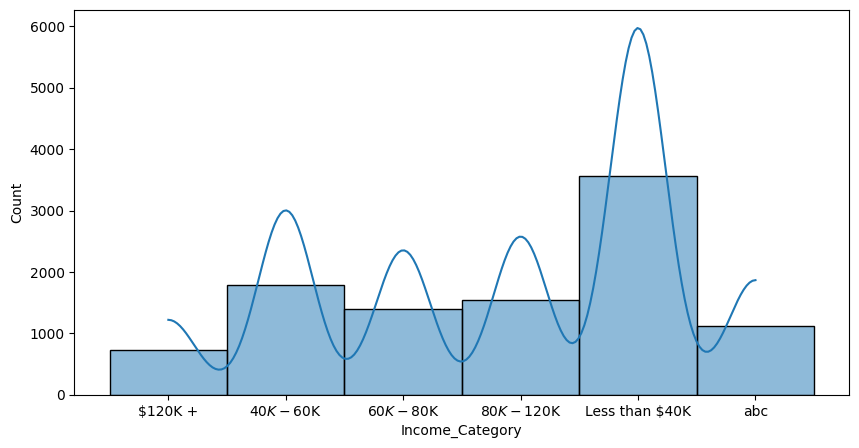

In [ ]:
# Display hisplot of the Income Category
plt.figure(figsize=(10,5))
sns.histplot(credit_card_churn, x='Income_Category', kde=True)
plt.show()

* For income level, most of the customers are reported to earn less than 40k per year, followed by 17.7% who earn between 40-60k, and 15.2% who earn 80-140k.
* Income category appears to be slightly left-skewed.

#### Card Category Analysis

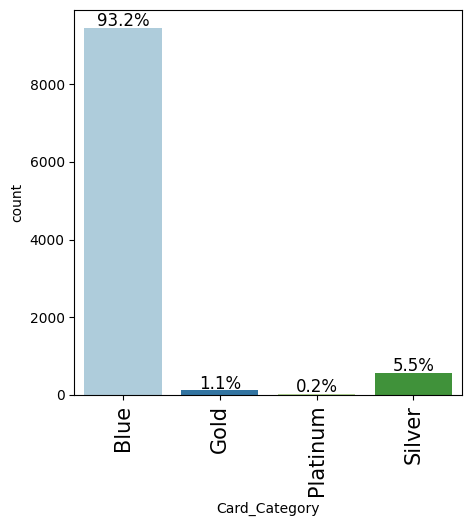

In [ ]:
# Display labeled barplot of Card Category
labeled_barplot(credit_card_churn, "Card_Category", perc=True)

* The majority of credit card customers have the Blue card (93.2%), followed by Silver (5.5%), Gold (1.1%), and last, Platinum (0.2%).

### Bivariate Analysis

#### Months on book and Attrition flag Analysis

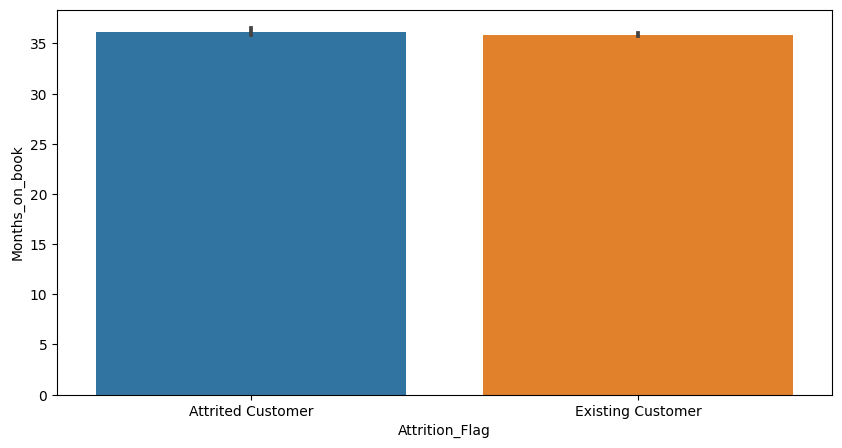

In [ ]:
# Displays the relationship between Months_on_book and Attrition_Flag
plt.figure(figsize=(10,5))
sns.barplot(data=credit_card_churn, y='Months_on_book', x='Attrition_Flag')
#plt.xticks(rotation=90)
plt.show()

* Months on book (period of relationship with bank) is essentially the same for attrited and existing customers.

#### Total relationship count and Attrition flag Analysis

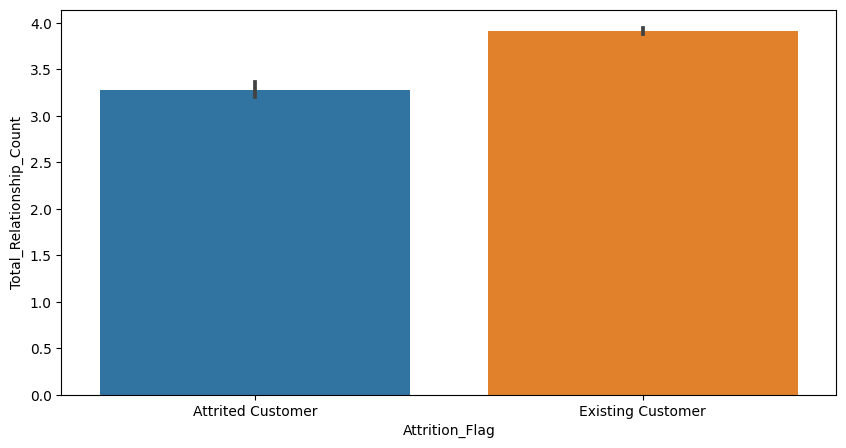

In [ ]:
# Displays the relationship between Total_Relationship_Count and Attrition_Flag
plt.figure(figsize=(10,5))
sns.barplot(data=credit_card_churn, y='Total_Relationship_Count', x='Attrition_Flag')
#plt.xticks(rotation=90)
plt.show()

* Total relationship count (total number of products held by customer) shows that customers who left the bank had less products than those who remained at the bank.

#### Months inactive (12 months) and Attrition flag Analysis

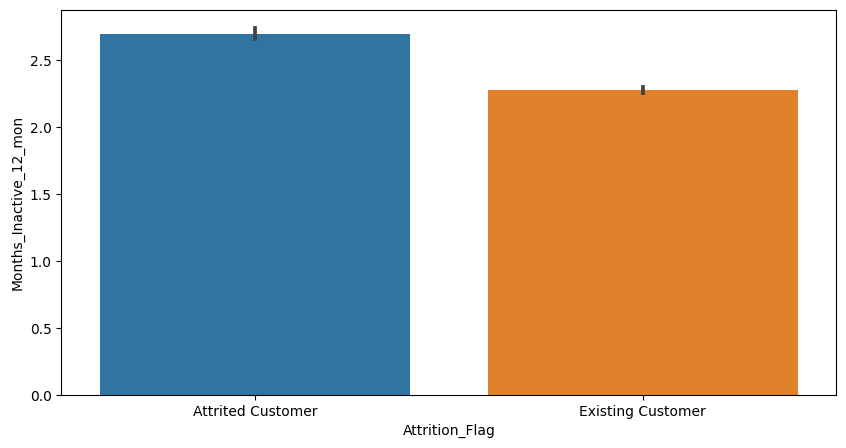

In [ ]:
# Displays the relationship between Months_Inactive_12_mon and Attrition_Flag
plt.figure(figsize=(10,5))
sns.barplot(data=credit_card_churn, y='Months_Inactive_12_mon', x='Attrition_Flag')
#plt.xticks(rotation=90)
plt.show()

* Customers who left the bank had more months inactive in the last 12 months than customers who remained with the bank.

#### Contacts count (12 months) and Attrition flag Analysis

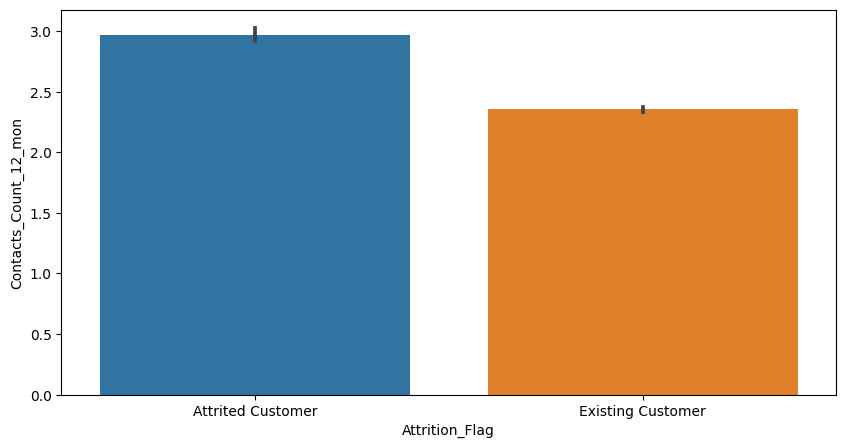

In [ ]:
# Displays the relationship between Contacts_Count_12_mon and Attrition_Flag
plt.figure(figsize=(10,5))
sns.barplot(data=credit_card_churn, y='Contacts_Count_12_mon', x='Attrition_Flag')
#plt.xticks(rotation=90)
plt.show()

* Customers who left the bank had more contact between customers and bank in the last 12 months than customers who remained with the bank.  This could suggest that those contacts or interations with the bank were so positive from the perspective of the attrited customers.

#### Change in transaction count (Q4 to Q1) and Attrition flag Analysis

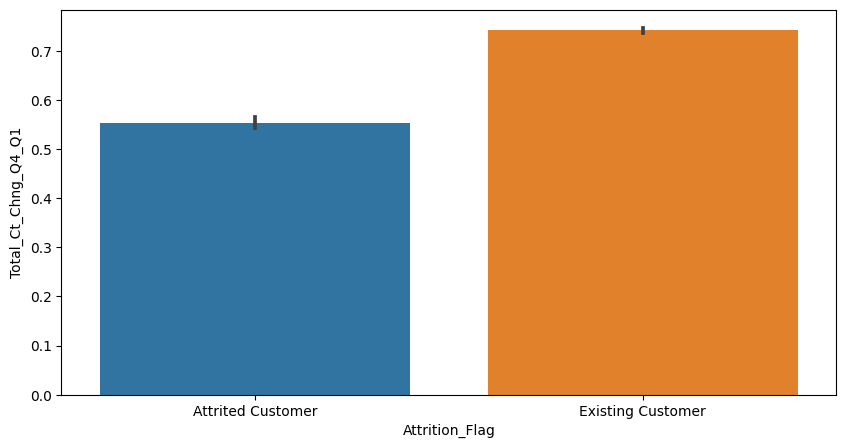

In [ ]:
# Displays the relationship between Total_Ct_Chng_Q4_Q1 and Attrition_Flag
plt.figure(figsize=(10,5))
sns.barplot(data=credit_card_churn, y='Total_Ct_Chng_Q4_Q1', x='Attrition_Flag')
#plt.xticks(rotation=90)
plt.show()

* The change in total transaction count from Q4 to Q1 is less for customers who have left the bank (55% for attrited customers vs. 75% for existing customers).
*It appears that even though attrited customers total transaction count from Q4 to Q1 increased, when compared to existing customers (who made 75% more transactions over the same period), they still made less transactions than those who did not leave the bank.

#### Change in transaction amount (Q4 to Q1) and Attrition flag Analysis

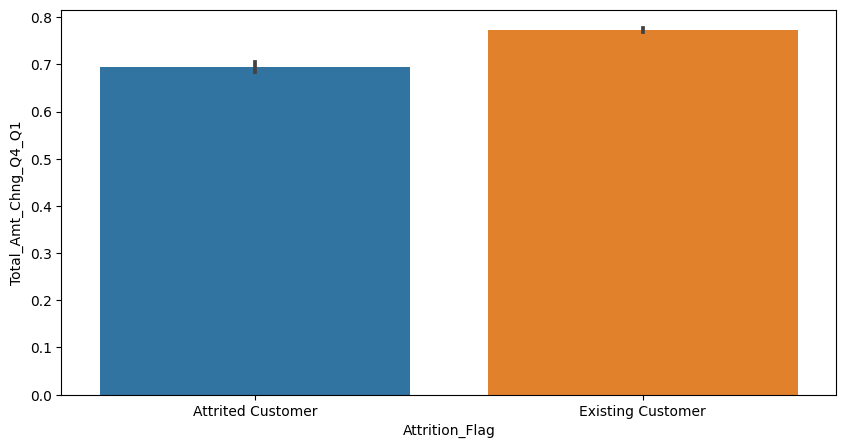

In [ ]:
# Displays the relationship between Total_Amt_Chng_Q4_Q1 and Attrition_Flag
plt.figure(figsize=(10,5))
sns.barplot(data=credit_card_churn, y='Total_Amt_Chng_Q4_Q1', x='Attrition_Flag')
#plt.xticks(rotation=90)
plt.show()

* The change in transaction amount from Q4 to Q1 is less for customers who have left the bank (69% for attrited customers vs. 77% for existing customers).
*It appears that even though attrited customers total transaction amount from Q4 to Q1 increased, when compared to existing customers (whose total transaction amount was 77% over the same period), their total transaction amount change was still less than those who did not leave the bank.

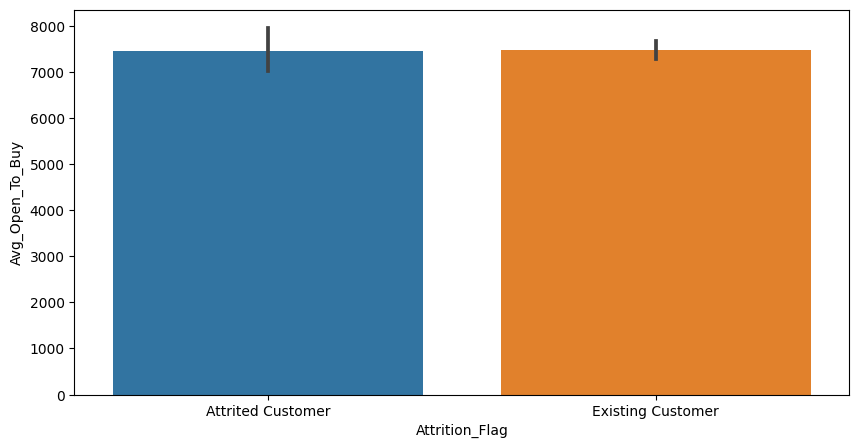

In [ ]:
# Displays the relationship between Avg_Open_To_Buy and Attrition_Flag
plt.figure(figsize=(10,5))
sns.barplot(data=credit_card_churn, y='Avg_Open_To_Buy', x='Attrition_Flag')
#plt.xticks(rotation=90)
plt.show()

* The average amount on the customer's credit card that is available for use over a 12 month period (Avg_Open_To_Buy) is about the same between attrited and existing customers.

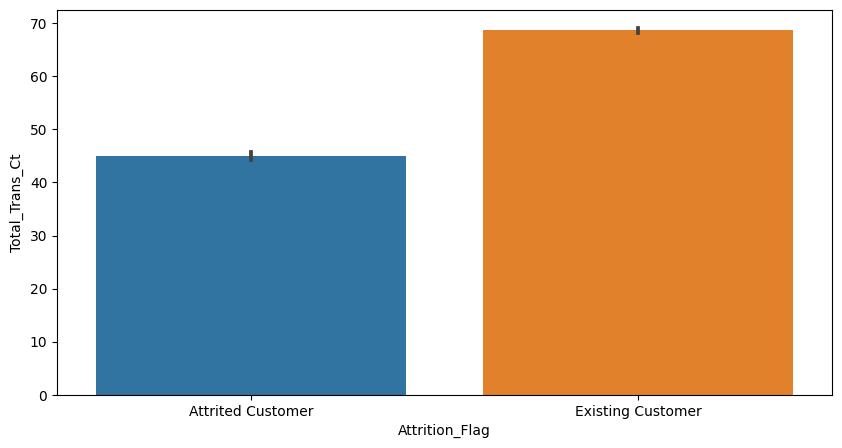

In [ ]:
# Displays the relationship between Total_Trans_Ct and Attrition_Flag
plt.figure(figsize=(10,5))
sns.barplot(data=credit_card_churn, y='Total_Trans_Ct', x='Attrition_Flag')
#plt.xticks(rotation=90)
plt.show()

* The total transaction count (Last 12 months) for attrited customers is much less (about 45) than for existing customers (about 68). This is about 33% lower.

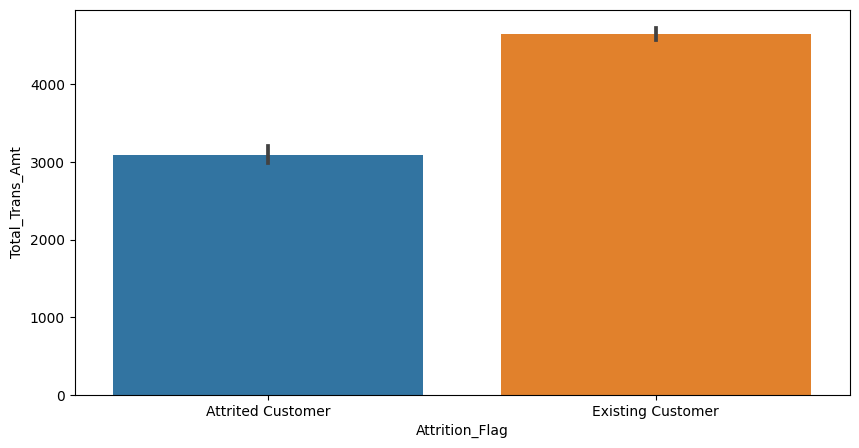

In [ ]:
# Displays the relationship between Total_Trans_Amt and Attrition_Flag
plt.figure(figsize=(10,5))
sns.barplot(data=credit_card_churn, y='Total_Trans_Amt', x='Attrition_Flag')
#plt.xticks(rotation=90)
plt.show()

* The total transaction amount (Last 12 months) for attrited customers is much less (about 3100 dollars) than for existing customers (about 4600 dollars). This is also about 33% lower.

### Multivariate Analysis

#### Heatmap Analysis

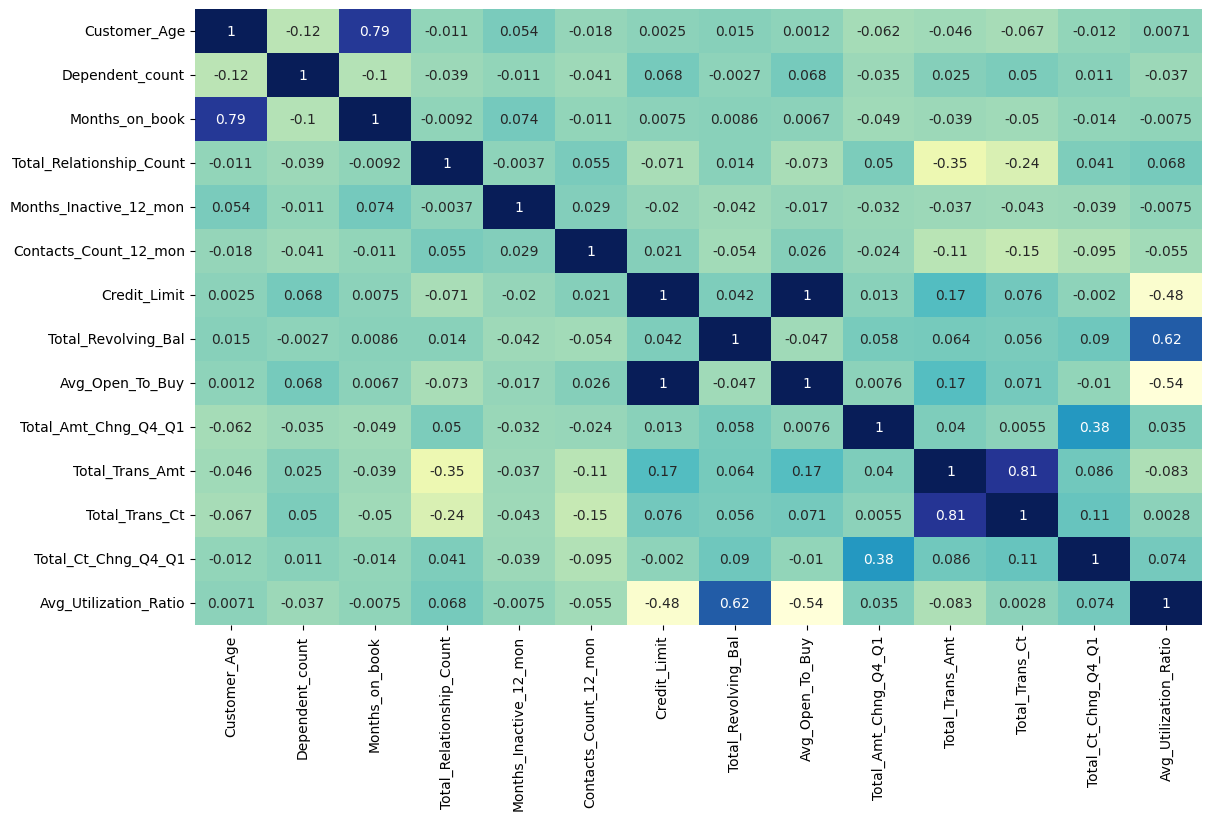

In [ ]:
# Display heatmap of our numeric features
plt.figure(figsize=(13,8))
sns.heatmap(data=credit_card_churn.corr(), annot=True, cbar=False, cmap='YlGnBu')
plt.show()

Observations:
* The correlation matrix reveals that several features have moderate to strong correlation with each other.
* Customer_Age has a moderate, positive correlation of 0.79 with Months_on_book.
* Credit_Limit is perfectly and positively correlated with Avg_Open_To_Buy.
* Total_Revolving_Bal has a moderate, positive correlation of 0.62 with Avg_Utilization_Ratio.
* Total_Trans_Amt has strong, positive correlation of 0.81 with Total_Trans_Ct.

#### Attrition Flag Pairplot Analysis

In [ ]:
sns.pairplot(credit_card_churn, hue="Attrition_Flag")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

The pairplot analysis shows strong relationships between these features:
* Customer_Age and Months_on_book.
* Credit_Limit and Avg_Open_To_Buy.
* Total_Trans_Amt and Total_Trans_Ct.

## Data Pre-processing

### Outlier Detection & Treatment

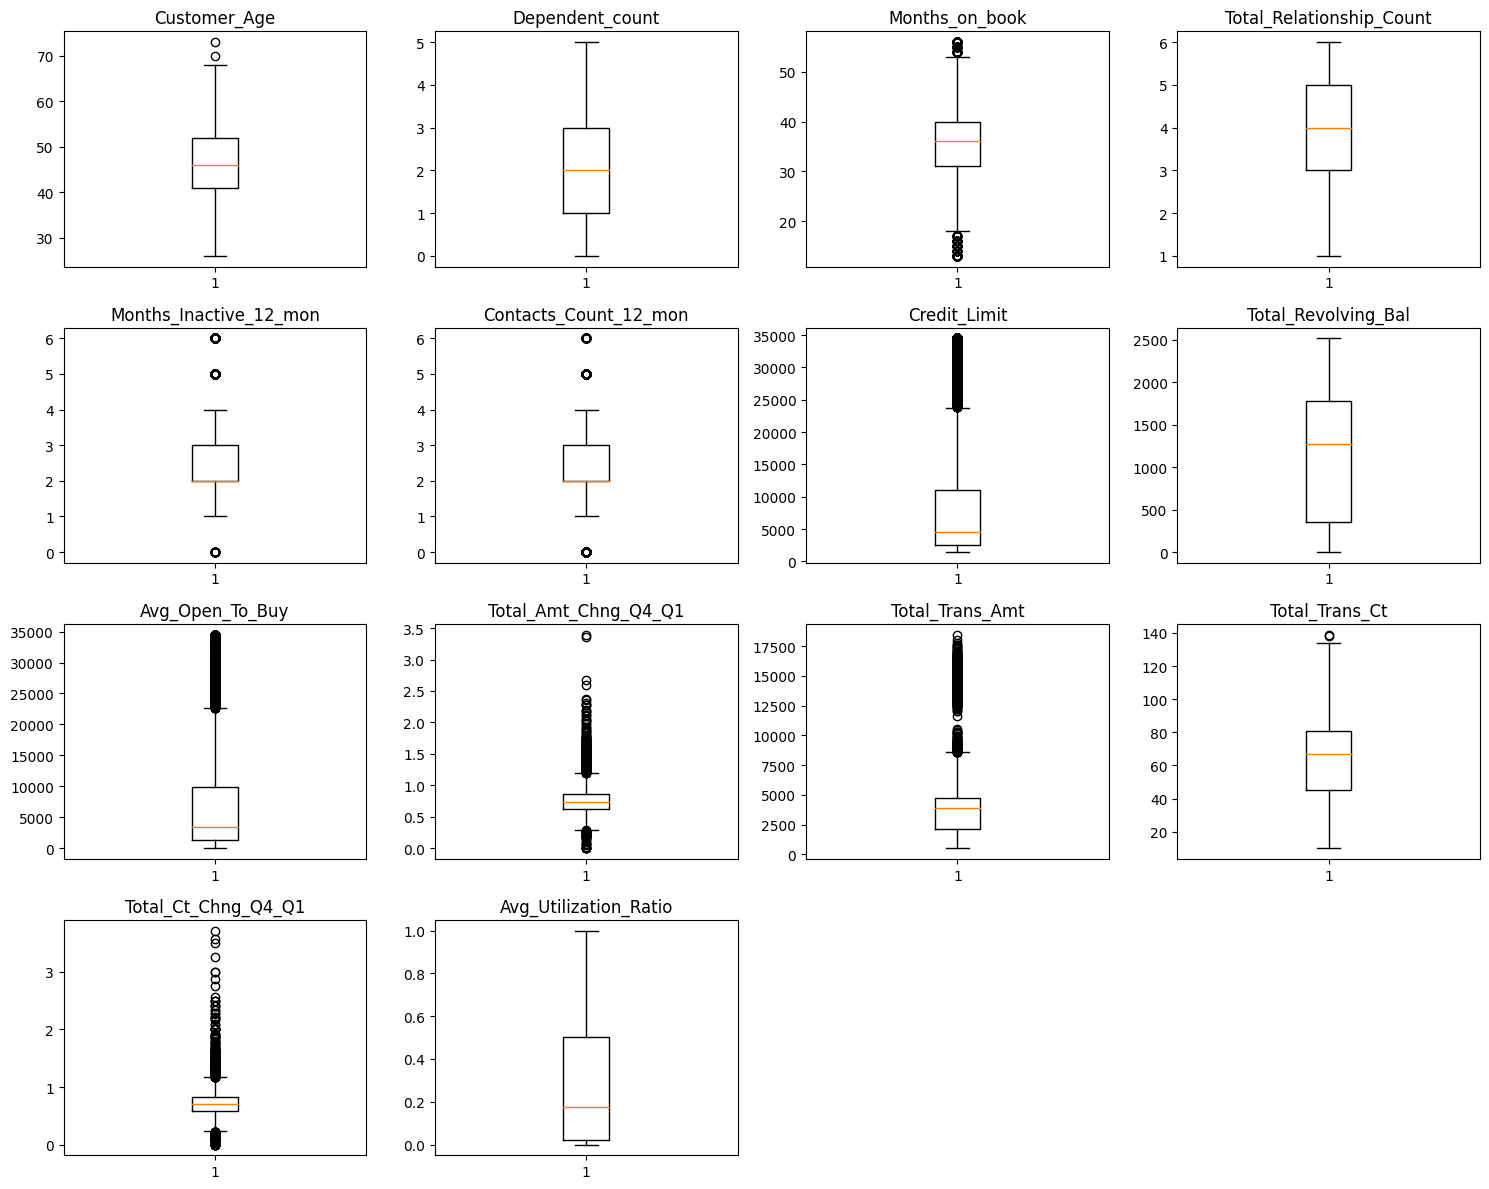

In [ ]:
# Outlier detection using boxplot
numeric_columns = credit_card_churn.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(credit_card_churn[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:
* From our outlier detection analysis we can see that the following 10 features have outliers:
 * Customer_Age
 * Months_on_book
 * Months_Inactive_12_mon
 * Contacts_Count_12_mon
 * Credit_Limit
 * Avg_Open_To_Buy
 * Total_Amt_Chng_Q4_Q1
 * Total_Trans_Amt
 * Total_Trans_Ct
 * Total_Ct_Chng_Q4_Q1

* After looking individually at each feature with outliers, the outliers values appear to be reasonable values given the nature of the dataset. Therefore, no outlier treatment is required at this time.

### Missing value imputation




In [ ]:
# Add 'Unknown' to the category for Education_Level and Marital_Status
credit_card_churn['Education_Level'] = credit_card_churn['Education_Level'].cat.add_categories('Unknown')
credit_card_churn['Marital_Status'] = credit_card_churn['Marital_Status'].cat.add_categories('Unknown')

# Now use fillna to replace NaN values with 'Unknown'
credit_card_churn['Education_Level'] = credit_card_churn['Education_Level'].fillna('Unknown')
credit_card_churn['Marital_Status'] = credit_card_churn['Marital_Status'].fillna('Unknown')

In [ ]:
# Address missing values; replacing Income_Category features with "Unknown"
credit_card_churn['Income_Category'] = credit_card_churn['Income_Category'].replace('abc', 'Unknown')

In [ ]:
feature_encoding = {
                    "Attrition_Flag": {"Existing Customer": 0, "Attrited Customer": 1},
                    "Gender": {"M": 1, "F": 2},
                    "Education_Level": {"Unknown": -1, "Uneducated": 1, "High School": 2, "College": 3, "Graduate": 4, "Post-Graduate": 5, "Doctorate": 6},
                    "Marital_Status": {"Unknown": -1, "Single": 1, "Married": 2, "Divorced": 3},
                    "Income_Category": {"Unknown": -1, "Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3, "$80K - $120K": 4, "$120K +": 5},
                    "Card_Category": {"Blue": 1, "Gold": 2, "Platinum": 3, "Silver": 4},
                    }
oneHotCols=["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category" ]

In [ ]:
credit_card_churn=credit_card_churn.replace(feature_encoding)
credit_card_churn=pd.get_dummies(credit_card_churn, columns=oneHotCols)
credit_card_churn.head(10)

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_5,Income_Category_2,Income_Category_3,Income_Category_4,Income_Category_1,Income_Category_-1,Card_Category_1,Card_Category_2,Card_Category_3,Card_Category_4
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,0,1,0,0,0
5,0,44,2,36,3,1,2,4010.0,1247,2763.0,...,0,1,0,0,0,0,1,0,0,0
6,0,51,4,46,6,1,3,34516.0,2264,32252.0,...,1,0,0,0,0,0,0,1,0,0
7,0,32,0,27,2,2,2,29081.0,1396,27685.0,...,0,0,1,0,0,0,0,0,0,1
8,0,37,3,36,5,2,0,22352.0,2517,19835.0,...,0,0,1,0,0,0,1,0,0,0
9,0,48,2,36,6,3,3,11656.0,1677,9979.0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Confirms missing values and One Hot Encoding treatment
credit_card_churn.sample(10)

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_5,Income_Category_2,Income_Category_3,Income_Category_4,Income_Category_1,Income_Category_-1,Card_Category_1,Card_Category_2,Card_Category_3,Card_Category_4
1538,0,27,0,22,4,1,2,1864.0,1384,480.0,...,0,0,0,0,1,0,1,0,0,0
6843,0,52,3,42,5,3,1,4565.0,1258,3307.0,...,0,0,1,0,0,0,1,0,0,0
6310,0,64,1,36,4,3,1,1861.0,1677,184.0,...,0,0,0,0,1,0,1,0,0,0
9682,0,49,4,38,3,3,1,34516.0,1562,32954.0,...,1,0,0,0,0,0,0,0,0,1
5842,0,43,1,25,4,3,3,1783.0,1014,769.0,...,0,0,1,0,0,0,1,0,0,0
9206,0,40,4,32,1,2,3,16191.0,0,16191.0,...,0,1,0,0,0,0,0,0,0,1
6289,0,42,3,36,6,3,1,4959.0,1483,3476.0,...,0,0,0,0,1,0,1,0,0,0
4618,0,56,3,50,5,2,2,8869.0,0,8869.0,...,0,0,0,0,1,0,1,0,0,0
7098,0,51,0,36,6,2,3,3232.0,1346,1886.0,...,0,0,1,0,0,0,1,0,0,0
2938,0,39,1,29,6,2,5,2722.0,1592,1130.0,...,0,0,0,0,1,0,1,0,0,0


Observations:
* There are 1519 customers with "N/A" for the Education_Level feature. This will be converted to "Unknown" so that it will not be flagged as a missing value. I believe it should not be imputed as there could be predictive power in the value of the feature having the "Unknown" attribute for the education level.  I think this is a conservative approach to take.

* There are 749 customers with the "NaN" value for the Marital_Status feature.
Rather using imputation to make an educated guess to change this value, I will simply change it to "Unknown" as there could be predictive power in the value of the feature having the "Unknown" attribute for the Marital_Status. I think this is a conservative approach to take.

* There are 1112 customers with the "abc" value for the Income_Category feature. Rather than using imputation to make an educated guess to change this value, I will simply change it to "Unknown" as there could be predictive power in the value of the feature having the "Unknown" attribute for the Income_Category. One again, I think this is the conservative approach to take.

* After creating a dictionary of key value pairs and One Hot Encoding the features, our features have now been encoded in preparation for the model building process.

In [ ]:
# Checking the distribution of the target variable
credit_card_churn['Attrition_Flag'].value_counts(1)

0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64

## Split the data into train and test sets

In [ ]:
# Creating X variable to store features and y variable to store target variable
X = credit_card_churn.drop("Attrition_Flag", axis=1)
y = credit_card_churn.pop("Attrition_Flag")

In [ ]:
# Splitting data into training, validation and test sets

# First, we split 80% for train+validation and 20% for test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=None)

# Second, we split the 80% into 75% train and 25% validation
# This results in 60% train and 20% validation of the original dataset
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1, stratify=None)

# Now we have X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64
********************************************************************************
Target value ratio in y_train
0    0.840658
1    0.159342
Name: Attrition_Flag, dtype: float64
********************************************************************************
Target value ratio in y_val
0    0.838105
1    0.161895
Name: Attrition_Flag, dtype: float64
********************************************************************************
Target value ratio in y_test
0    0.836624
1    0.163376
Name: Attrition_Flag, dtype: float64
********************************************************************************


* Based on the above we have maintain the same class ratio in our train, validation and test sets as is represented in the original, imbalanced dataset.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

**Function to create confusion matrix.**

In [ ]:
## Function to create confusion matrix --- THIS IS STILL NOT WORKING AFTER TRYING TO FIX IT
# Try again or remove it before submission
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    #cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    cm=confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Function to computer and display confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    The model parameters are decision tree classifier, predictors/explantory and response/dependent variables)
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

#### Model 1 - Decision Tree Model

In [ ]:
# Create model and fit training set to it
decisiontree = DecisionTreeClassifier(random_state=1)
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
decisiontree_model_train_perf = model_performance_classification_sklearn(decisiontree, X_train, y_train)
print("Training performance \n",decisiontree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


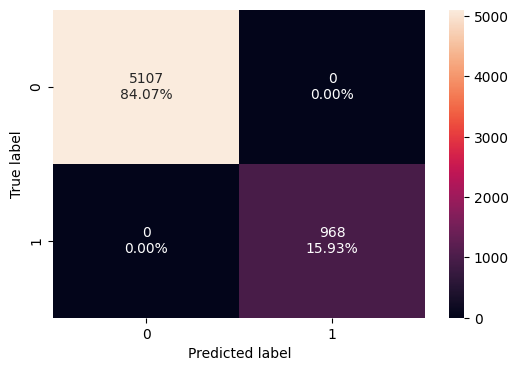

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(decisiontree, X_train, y_train)

* The decision tree classifier model is overfitting on the original training set resulting in a Recall score of 100%.

In [ ]:
# Calculate performance on model for validation set
decisiontree_model_val_perf = model_performance_classification_sklearn(decisiontree, X_val, y_val)
print("Validation performance \n",decisiontree_model_val_perf)

Validation performance 
    Accuracy    Recall  Precision       F1
0  0.932379  0.789634   0.792049  0.79084


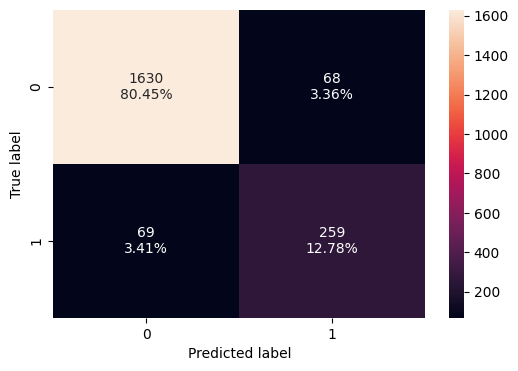

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(decisiontree, X_val, y_val)

* The decision tree classifier model is underperforming on the original validation set resulting in a Recall score 78.9%.

#### Model 2 - Bagging Model

In [ ]:
# Create model and fit training set to it
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
bagging_model_train_perf = model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n", bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.996708  0.982438   0.996855  0.989594


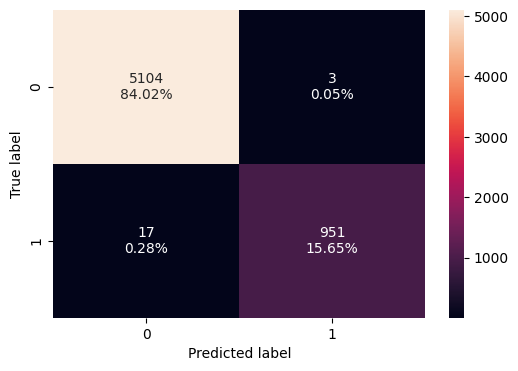

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(bagging, X_train, y_train)

* The bagging classifier model is performing very well (likely overfitting) on the original training set resulting in a Recall score of 98.2%.

In [ ]:
# Calculate model performance for validation set
bagging_model_val_perf = model_performance_classification_sklearn(bagging, X_val, y_val)
print("Validation performance \n", bagging_model_val_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.951629  0.789634   0.899306  0.840909


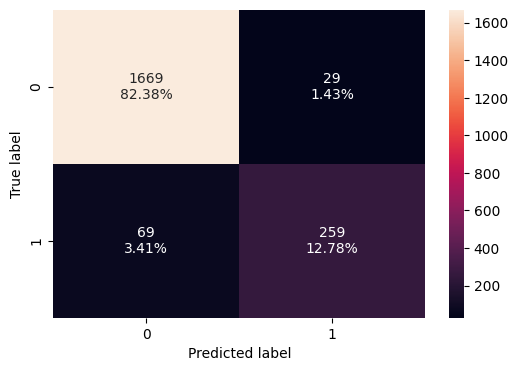

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(bagging, X_val, y_val)

* The bagging classifier model is underperforming on the original validation set resulting in a Recall score of 78.9%.

#### Model 3 - Random Forest Model

In [ ]:
# Create model and fit training set to it
randomforest = RandomForestClassifier(random_state=1)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
randomforest_model_train_perf = model_performance_classification_sklearn(randomforest, X_train, y_train)
print("Training performance \n", randomforest_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


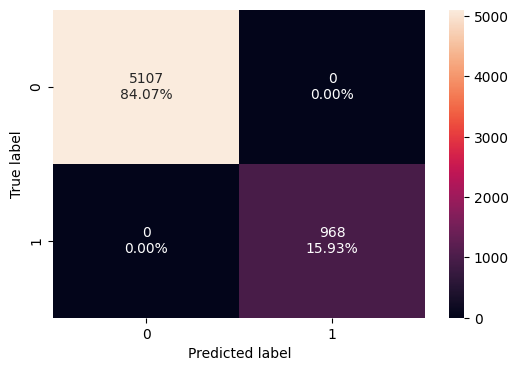

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(randomforest, X_train, y_train)

* The random forest classifier model is overfitting on the original training set resulting in a Recall score of 100%.

In [ ]:
# Calculate model performance for validation set
randomforest_model_val_perf = model_performance_classification_sklearn(randomforest, X_val, y_val)
print("Validation performance \n", randomforest_model_val_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.955084  0.762195    0.95057  0.846024


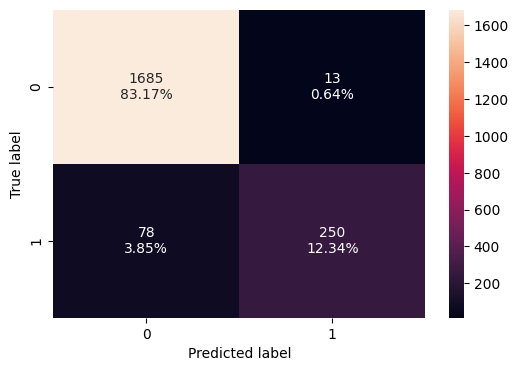

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(randomforest, X_val, y_val)

* The random forest classifier is underperforming on the original validation set resulting in a Recall score of 76.2%.

#### Model 4 - AdaBoost Classifier

In [ ]:
# Create model and fit training set to it
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
adaboost_model_train_perf = model_performance_classification_sklearn(adaboost, X_train, y_train)
print("Training performance \n", adaboost_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.962798  0.856405   0.905022  0.880042


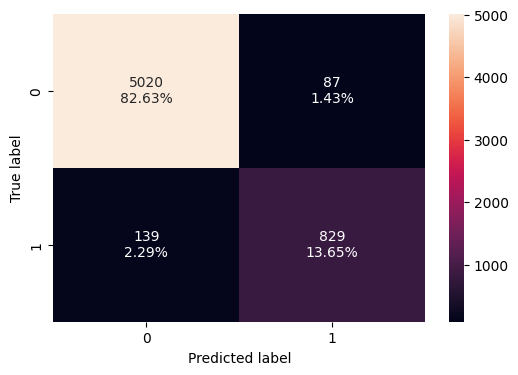

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(adaboost, X_train, y_train)

* The AdaBoost classifier model is performing well on the original training set resulting in a Recall score of 85.6%.

In [ ]:
# Calculate model performance for validation set
adaboost_model_val_perf = model_performance_classification_sklearn(adaboost, X_val, y_val)
print("Validation performance \n", adaboost_model_val_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.956565  0.823171        0.9  0.859873


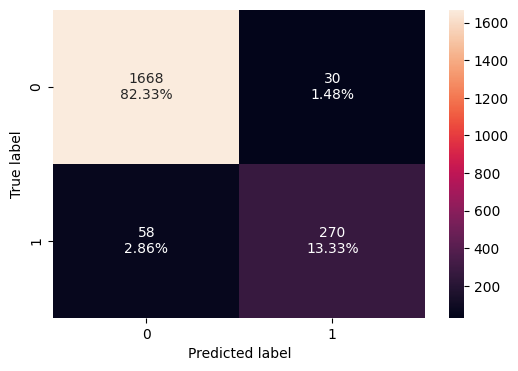

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(adaboost, X_val, y_val)

* The AdaBoost classifier model is also performing well on the original validation set resulting in a Recall score of 82.3%.

#### Model 5 - Gradient Boosting Model

In [ ]:
# Create model and fit training set to it
gradientboost = GradientBoostingClassifier(random_state=1)
gradientboost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
gradientboost_model_train_perf = model_performance_classification_sklearn(gradientboost, X_train, y_train)
print("Training performance \n", gradientboost_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.979095  0.899793   0.966704  0.932049


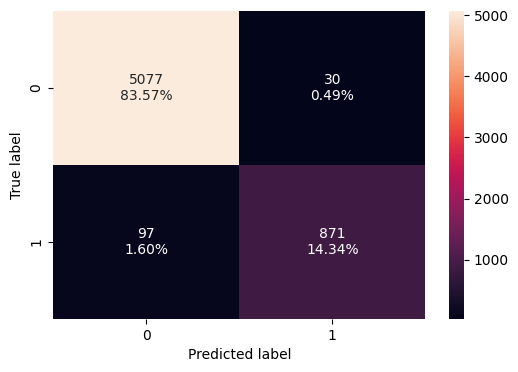

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(gradientboost, X_train, y_train)

* The gradient boosting classifier model is performing well on the original training set resulting in a Recall score of 89.9%.

In [ ]:
# Calculate model performance for validation set
gradientboost_model_val_perf = model_performance_classification_sklearn(gradientboost, X_val, y_val)
print("Validation performance \n", gradientboost_model_val_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.963475  0.829268   0.937931  0.880259


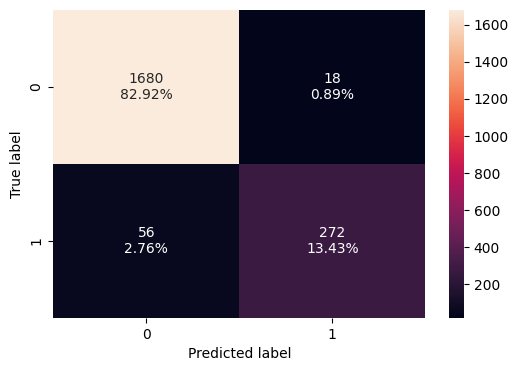

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(gradientboost, X_val, y_val)

* The gradient boosting classifier model is also performing well on the original validation set resulting in a Recall score of 82.9%.

#### Model 6 - XGBoost Model

In [ ]:
# Create model and fit training set to it
xgboost = XGBClassifier(random_state=1)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculate model performance for training set
xgboost_model_train_perf = model_performance_classification_sklearn(xgboost, X_train, y_train)
print("Training performance \n", xgboost_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


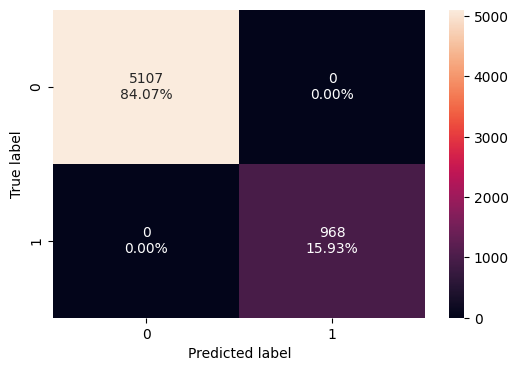

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(xgboost, X_train, y_train)

* The XGBoost classifer model is overfitting on the original training set resulting in a Recall score of 100%.

In [ ]:
# Calculate model performance for validation set
xgboost_model_val_perf = model_performance_classification_sklearn(xgboost, X_val, y_val)
print("Validation performance \n", xgboost_model_val_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.967917  0.862805   0.933993  0.896989


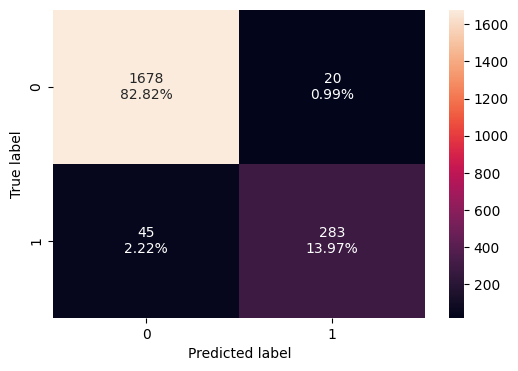

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(xgboost, X_val, y_val)

* The XGBoost classifer model is performing well on the original validation set resulting in a Recall score of 86.2%.

#### Summary of the six models with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("decisiontree", DecisionTreeClassifier(random_state=1)))
models.append(("bagging", BaggingClassifier(random_state=1)))
models.append(("randomforest", RandomForestClassifier(random_state=1)))
models.append(("adaboost", AdaBoostClassifier(random_state=1)))
models.append(("gradientboost", GradientBoostingClassifier(random_state=1)))
models.append(("xgboost", XGBClassifier(random_state=1)))
#'_______' ## Complete the code to append remaining 3 models in the list models


print("\n" "Training Performance (Original Data):" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance (Original Data):" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance (Original Data):

decisiontree: 1.0
bagging: 0.9824380165289256
randomforest: 1.0
adaboost: 0.856404958677686
gradientboost: 0.8997933884297521
xgboost: 1.0

Validation Performance (Original Data):

decisiontree: 0.7896341463414634
bagging: 0.7896341463414634
randomforest: 0.7621951219512195
adaboost: 0.823170731707317
gradientboost: 0.8292682926829268
xgboost: 0.8628048780487805


* Using the original data, many of our models overfitted the training set, and performed poorly on the valdation set.

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique - Training set
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 968
Before OverSampling, count of label '0': 5107 

After OverSampling, count of label '1': 5107
After OverSampling, count of label '0': 5107 

After OverSampling, the shape of train_X: (10214, 37)
After OverSampling, the shape of train_y: (10214,) 



In [ ]:
# Synthetic Minority Over Sampling Technique - Validation set
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_val_over, y_val_over = sm.fit_resample(X_val, y_val)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_val == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_val == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_val_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_val_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_val_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_val_over.shape))

Before OverSampling, count of label '1': 328
Before OverSampling, count of label '0': 1698 

After OverSampling, count of label '1': 1698
After OverSampling, count of label '0': 1698 

After OverSampling, the shape of train_X: (3396, 37)
After OverSampling, the shape of train_y: (3396,) 



#### Model 1 - Decision Tree Model (Over-Sampled)

In [ ]:
# Create model and fit training set to it
decisiontree_over = DecisionTreeClassifier(random_state=1)
decisiontree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
decisiontree_model_train_over_perf = model_performance_classification_sklearn(decisiontree_over, X_train_over, y_train_over)
print("Training performance \n",decisiontree_model_train_over_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


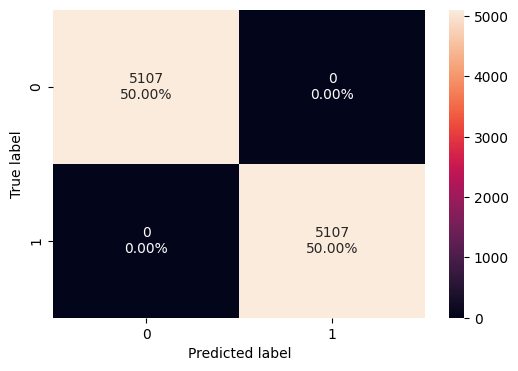

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(decisiontree_over, X_train_over, y_train_over)

* The decision tree classifier model is overfitting on the over-sampled training set resulting in a Recall score of 100%.

In [ ]:
# Calculate performance on model for validation set
decisiontree_model_val_over_perf = model_performance_classification_sklearn(decisiontree_over, X_val_over, y_val_over)
print("Validation performance \n",decisiontree_model_val_over_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.924617  0.905183   0.941789  0.923123


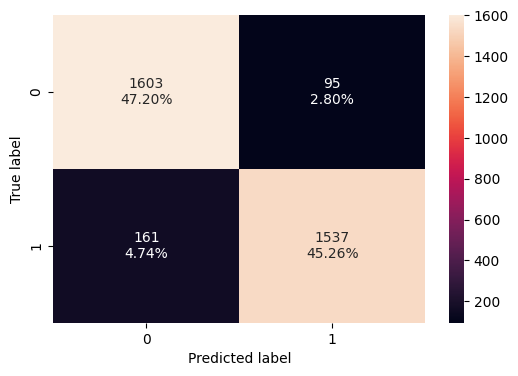

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(decisiontree_over, X_val_over, y_val_over)

* The decision tree classifier model is performing well on the over-sampled validation set resulting in a Recall score 90.5%.

#### Model 2 - Bagging Model (Over-Sampled)

In [ ]:
# Create model and fit training set to it
bagging_over = BaggingClassifier(random_state=1)
bagging_over.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
bagging_model_train_over_perf = model_performance_classification_sklearn(bagging_over, X_train_over, y_train_over)
print("Training performance \n", bagging_model_train_over_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.956824  0.914235   0.999358  0.954903


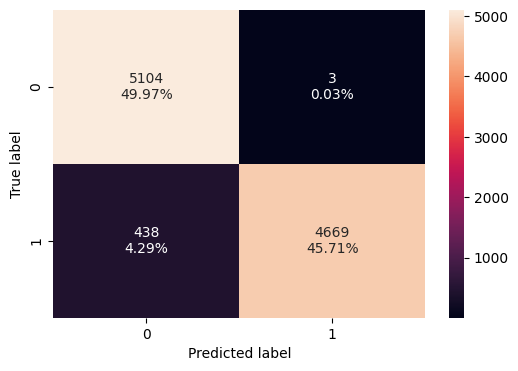

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(bagging_over, X_train_over, y_train_over)

* The bagging classifier model is performing very well on the over-sampled training set resulting in a Recall score of 91.4%.

In [ ]:
# Calculate model performance for validation set
bagging_model_val_over_perf = model_performance_classification_sklearn(bagging_over, X_val_over, y_val_over)
print("Validation performance \n", bagging_model_val_over_perf)

Validation performance 
    Accuracy    Recall  Precision       F1
0  0.907833  0.832744   0.979903  0.90035


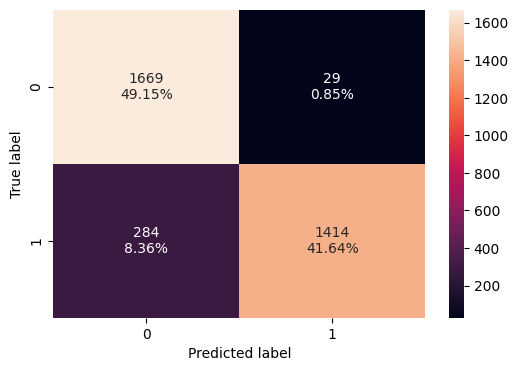

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(bagging_over, X_val_over, y_val_over)

* The bagging classifier model is performing less well on the over-sampled validation set resulting in a Recall score of 83.2%.

#### Model 3 - Random Forest Model (Over-Sampled)

In [ ]:
# Create model and fit training set to it
randomforest_over = RandomForestClassifier(random_state=1)
randomforest_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
randomforest_model_train_over_perf = model_performance_classification_sklearn(randomforest_over, X_train_over, y_train_over)
print("Training performance \n", randomforest_model_train_over_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


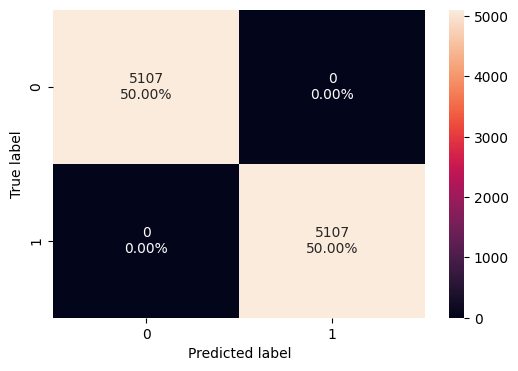

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(randomforest_over, X_train_over, y_train_over)

* The random forest classifier model is overfitting on the over-sampled training set resulting in a Recall score of 100%.

In [ ]:
# Calculate model performance for validation set
randomforest_model_val_over_perf = model_performance_classification_sklearn(randomforest_over, X_val_over, y_val_over)
print("Validation performance \n", randomforest_model_val_over_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.965253  0.952297    0.97763  0.964797


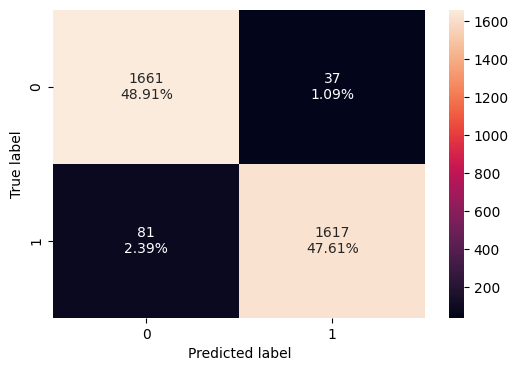

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(randomforest_over, X_val_over, y_val_over)

* The random forest classifier is performing well on the over-sampled validation set resulting in a Recall score of 95.2%.

#### Model 4 - AdaBoost Classifier (Over-Sampled)

In [ ]:
# Create model and fit training set to it
adaboost_over = AdaBoostClassifier(random_state=1)
adaboost_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
adaboost_model_train_over_perf = model_performance_classification_sklearn(adaboost_over, X_train_over, y_train_over)
print("Training performance \n", adaboost_model_train_over_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.964852  0.963971   0.965673  0.964821


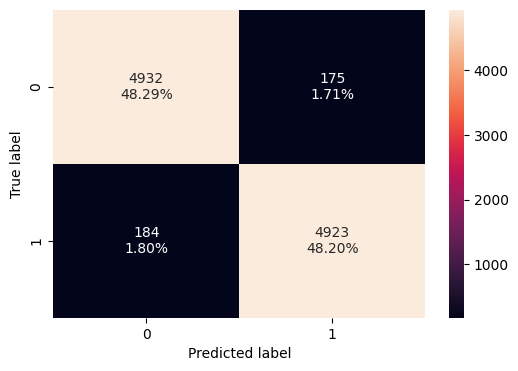

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(adaboost_over, X_train_over, y_train_over)

* The AdaBoost classifier model is performing well on the over-sampled training set resulting in a Recall score of 96.3%.

In [ ]:
# Calculate model performance for validation set
adaboost_model_val_over_perf = model_performance_classification_sklearn(adaboost_over, X_val_over, y_val_over)
print("Validation performance \n", adaboost_model_val_over_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.963781  0.964664   0.962963  0.963813


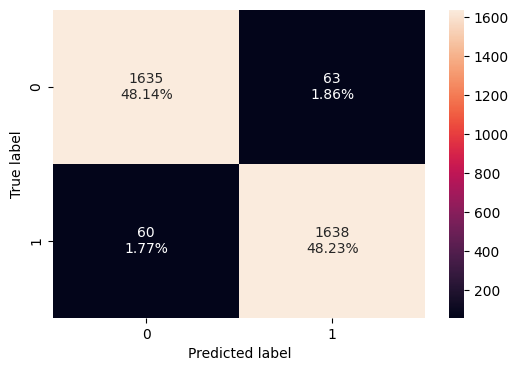

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(adaboost_over, X_val_over, y_val_over)

* The AdaBoost classifier model is performing well on the over-sampled validation set resulting in a Recall score of 96.4%.

#### Model 5 - Gradient Boosting Model (Over-Sampled)

In [ ]:
# Create model and fit training set to it
gradientboost_over = GradientBoostingClassifier(random_state=1)
gradientboost_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
gradientboost_model_train_over_perf = model_performance_classification_sklearn(gradientboost_over, X_train_over, y_train_over)
print("Training performance \n", gradientboost_model_train_over_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.980615  0.982181   0.979114  0.980645


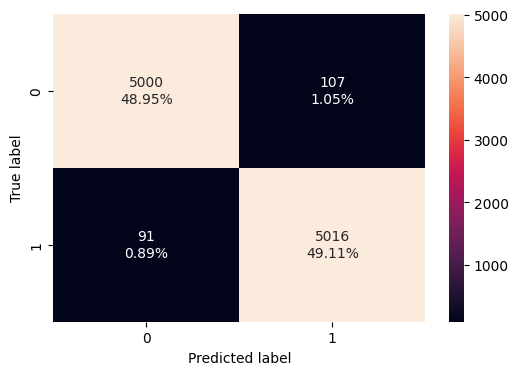

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(gradientboost_over, X_train_over, y_train_over)

* The gradient boosting classifier model is performing well on the over-sampled training set resulting in a Recall score of 98.2%.

In [ ]:
# Calculate model performance for validation set
gradientboost_model_val_over_perf = model_performance_classification_sklearn(gradientboost_over, X_val_over, y_val_over)
print("Validation performance \n", gradientboost_model_val_over_perf)

Validation performance 
    Accuracy    Recall  Precision       F1
0  0.973793  0.972909   0.974631  0.97377


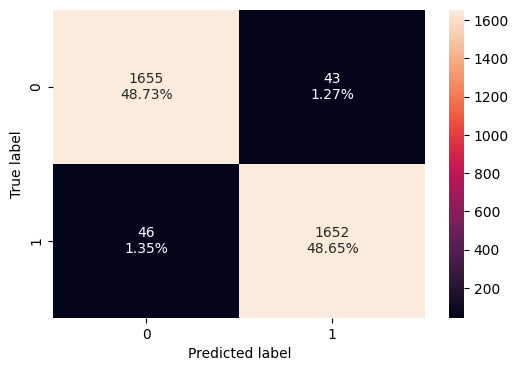

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(gradientboost_over, X_val_over, y_val_over)

* The gradient boosting classifier model is performing well on the over-sampled validation set resulting in a Recall score of 97.2%.

#### Model 6 - XGBoost Model (Over-sampled)

In [ ]:
# Create model and fit training set to it
xgboost_over = XGBClassifier(random_state=1)
xgboost_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculate model performance for training set
xgboost_model_train_over_perf = model_performance_classification_sklearn(xgboost_over, X_train_over, y_train_over)
print("Training performance \n", xgboost_model_train_over_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


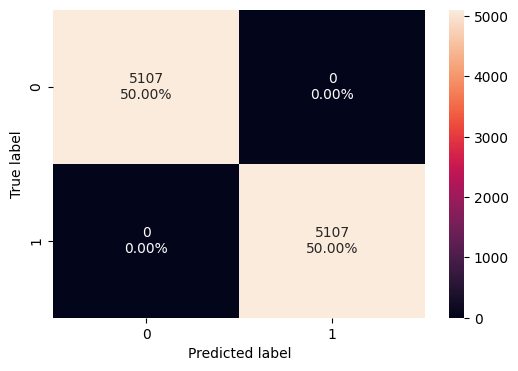

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(xgboost_over, X_train_over, y_train_over)

* The XGBoost classifer model is overfitting on the over-sampled training set resulting in a Recall score of 100%.

In [ ]:
# Calculate model performance for validation set
xgboost_model_val_over_perf = model_performance_classification_sklearn(xgboost_over, X_val_over, y_val_over)
print("Validation performance \n", xgboost_model_val_over_perf)

Validation performance 
    Accuracy   Recall  Precision        F1
0  0.977032  0.97232    0.98157  0.976923


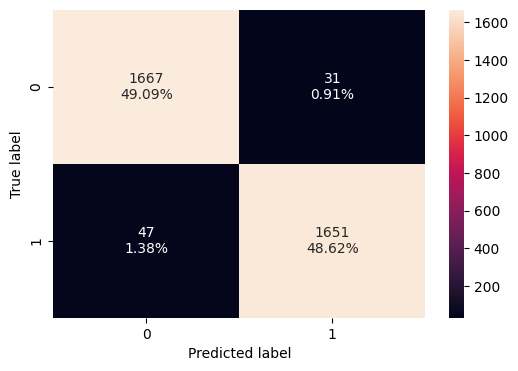

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(xgboost_over, X_val_over, y_val_over)

* The XGBoost classifer model is performing very well on the over-sampled validation set resulting in a Recall score of 97.2%.

#### Summary of the six models with over-sampled data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("decisiontree_over", DecisionTreeClassifier(random_state=1)))
models.append(("bagging_over", BaggingClassifier(random_state=1)))
models.append(("randomforest_over", RandomForestClassifier(random_state=1)))
models.append(("adaboost_over", AdaBoostClassifier(random_state=1)))
models.append(("gradientboost_over", GradientBoostingClassifier(random_state=1)))
models.append(("xgboost_over", XGBClassifier(random_state=1)))

print("\n" "Training Performance (Over-Sampled Data):" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance (Over-Sampled Data):" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val_over = recall_score(y_val_over, model.predict(X_val_over))
    print("{}: {}".format(name, scores_val_over))


Training Performance (Over-Sampled Data):

decisiontree_over: 1.0
bagging_over: 0.9976502839240259
randomforest_over: 1.0
adaboost_over: 0.9639710201683963
gradientboost_over: 0.982181319757196
xgboost_over: 1.0

Validation Performance (Over-Sampled Data):

decisiontree_over: 0.9051825677267373
bagging_over: 0.9228504122497055
randomforest_over: 0.9522968197879859
adaboost_over: 0.9646643109540636
gradientboost_over: 0.9729093050647821
xgboost_over: 0.9723203769140165


* Using the oversampled data, many of our models continued to overfit the training set, but they performed much better on the valdation set.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_under == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_under == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_under.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before OverSampling, count of label '1': 968
Before OverSampling, count of label '0': 5107 

After OverSampling, count of label '1': 968
After OverSampling, count of label '0': 968 

After OverSampling, the shape of train_X: (1936, 37)
After OverSampling, the shape of train_y: (1936,) 



In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_val_under, y_val_under = rus.fit_resample(X_val, y_val)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_val == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_val == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_val_under == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_val_under == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_val_under.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_val_under.shape))

Before OverSampling, count of label '1': 328
Before OverSampling, count of label '0': 1698 

After OverSampling, count of label '1': 328
After OverSampling, count of label '0': 328 

After OverSampling, the shape of train_X: (656, 37)
After OverSampling, the shape of train_y: (656,) 



#### Model 1 - Decision Tree Model (Under-Sampled)

In [ ]:
# Create model and fit training set to it
decisiontree_under = DecisionTreeClassifier(random_state=1)
decisiontree_under.fit(X_train_under,y_train_under)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
decisiontree_model_train_under_perf = model_performance_classification_sklearn(decisiontree_under, X_train_under, y_train_under)
print("Training performance \n",decisiontree_model_train_under_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


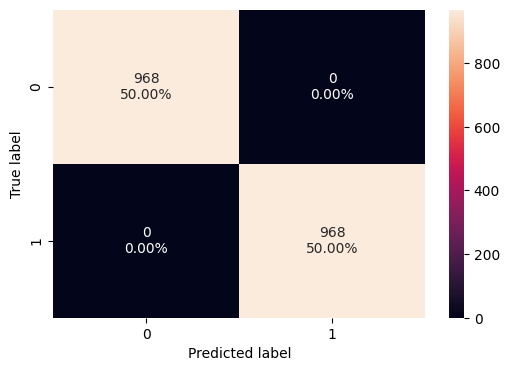

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(decisiontree_under, X_train_under, y_train_under)

* The decision tree classifier model is overfitting on the under-sampled training set resulting in a Recall score of 100%.

In [ ]:
# Calculate performance on model for validation set
decisiontree_model_val_under_perf = model_performance_classification_sklearn(decisiontree_under, X_val_under, y_val_under)
print("Validation performance \n",decisiontree_model_val_under_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.878049  0.878049   0.878049  0.878049


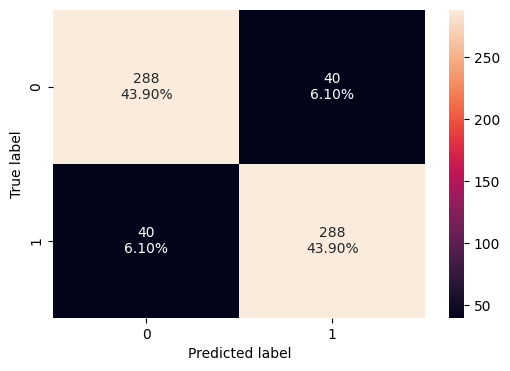

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(decisiontree_under, X_val_under, y_val_under)

* The decision tree classifier model is performing well on the under-sampled validation set resulting in a Recall score 87.8%.

#### Model 2 - Bagging Model (Under-Sampled)

In [ ]:
# Create model and fit training set to it
bagging_under = BaggingClassifier(random_state=1)
bagging_under.fit(X_train_under, y_train_under)

BaggingClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
bagging_model_train_under_perf = model_performance_classification_sklearn(bagging_under, X_train_under, y_train_under)
print("Training performance \n", bagging_model_train_under_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.995351  0.993802   0.996891  0.995344


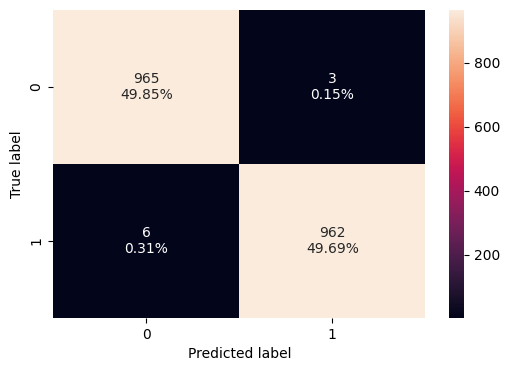

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(bagging_under, X_train_under, y_train_under)

* The bagging classifier model is performing very well (likely overfitting) on the under-sampled training set resulting in a Recall score of 99.3%.

In [ ]:
# Calculate model performance for validation set
bagging_model_val_under_perf = model_performance_classification_sklearn(bagging_under, X_val_under, y_val_under)
print("Validation performance \n", bagging_model_val_under_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.917683  0.935976   0.902941  0.919162


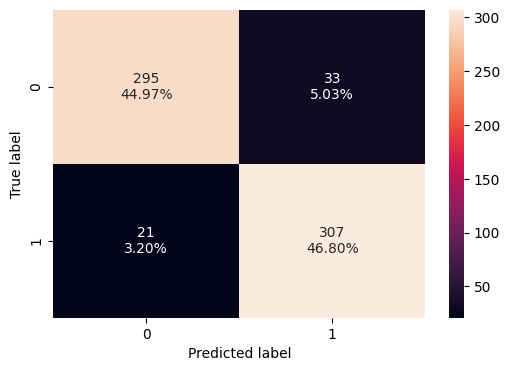

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(bagging_under, X_val_under, y_val_under)

* The bagging classifier model is performing very well on the under-sampled validation set resulting in a Recall score of 93.5%.

#### Model 3 - Random Forest Model (Under-Sampled)

In [ ]:
# Create model and fit training set to it
randomforest_under = RandomForestClassifier(random_state=1)
randomforest_under.fit(X_train_under, y_train_under)

RandomForestClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
randomforest_model_train_under_perf = model_performance_classification_sklearn(randomforest_under, X_train_under, y_train_under)
print("Training performance \n", randomforest_model_train_under_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


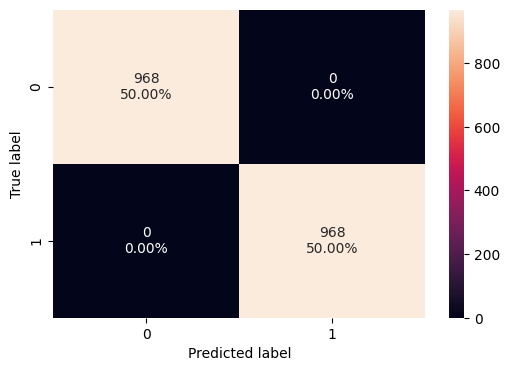

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(randomforest_under, X_train_under, y_train_under)

* The random forest classifier model is overfitting on the under-sampled training set resulting in a Recall score of 100%.

In [ ]:
# Calculate model performance for validation set
randomforest_model_val_under_perf = model_performance_classification_sklearn(randomforest_under, X_val_under, y_val_under)
print("Validation performance \n", randomforest_model_val_under_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.943598  0.969512   0.921739  0.945022


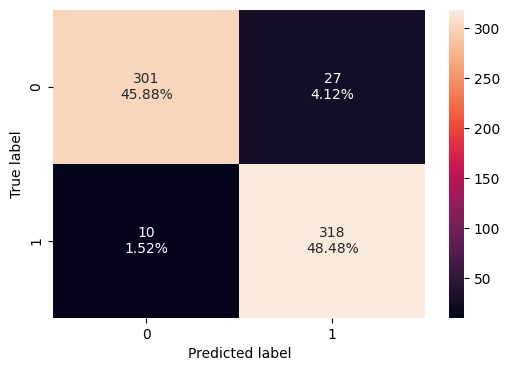

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(randomforest_under, X_val_under, y_val_under)

* The random forest classifier is performing very well on the under-sampled validation set resulting in a Recall score of 96.9%.

#### Model 4 - AdaBoost Classifier (Under-Sampled)

In [ ]:
# Create model and fit training set to it
adaboost_under = AdaBoostClassifier(random_state=1)
adaboost_under.fit(X_train_under, y_train_under)

AdaBoostClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
adaboost_model_train_under_perf = model_performance_classification_sklearn(adaboost_under, X_train_under, y_train_under)
print("Training performance \n", adaboost_model_train_under_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.954545  0.957645   0.951745  0.954686


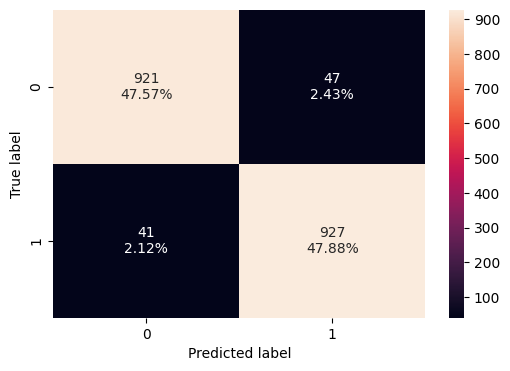

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(adaboost_under, X_train_under, y_train_under)

* The AdaBoost classifier model is performing very well on the under-sampled training set resulting in a Recall score of 95.7%.

In [ ]:
# Calculate model performance for validation set
adaboost_model_val_under_perf = model_performance_classification_sklearn(adaboost_under, X_val_under, y_val_under)
print("Validation performance \n", adaboost_model_val_under_perf)

Validation performance 
    Accuracy    Recall  Precision       F1
0   0.92378  0.942073   0.908824  0.92515


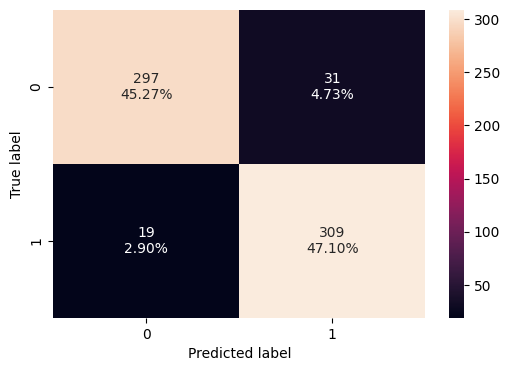

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(adaboost_under, X_val_under, y_val_under)

* The AdaBoost classifier model is performing very well on the under-sampled validation set resulting in a Recall score of 94.2%.

#### Model 5 - Gradient Boosting Model (Under-Sampled)

In [ ]:
# Create model and fit training set to it
gradientboost_under = GradientBoostingClassifier(random_state=1)
gradientboost_under.fit(X_train_under, y_train_under)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Calculate model performance for training set
gradientboost_model_train_under_perf = model_performance_classification_sklearn(gradientboost_under, X_train_under, y_train_under)
print("Training performance \n", gradientboost_model_train_under_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.981405  0.987603    0.97551  0.98152


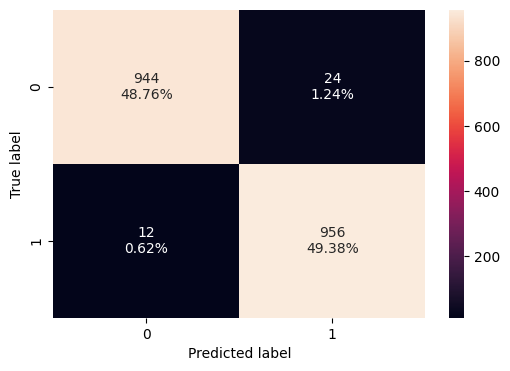

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(gradientboost_under, X_train_under, y_train_under)

* The gradient boosting classifier model is performing very well on the under-sampled training set resulting in a Recall score of 98.7%.

In [ ]:
# Calculate model performance for validation set
gradientboost_model_val_under_perf = model_performance_classification_sklearn(gradientboost_under, X_val_under, y_val_under)
print("Validation performance \n", gradientboost_model_val_under_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.945122  0.963415   0.929412  0.946108


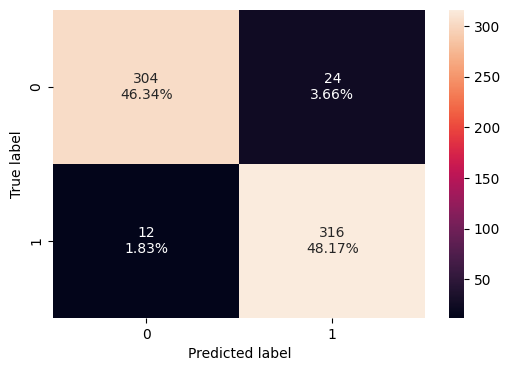

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(gradientboost_under, X_val_under, y_val_under)

* The gradient boosting classifier model is performing very well on the under-sampled validation set resulting in a Recall score of 96.3%.

#### Model 6 - XGBoost Model (Under-sampled)

In [ ]:
# Create model and fit training set to it
xgboost_under = XGBClassifier(random_state=1)
xgboost_under.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculate model performance for training set
xgboost_model_train_under_perf = model_performance_classification_sklearn(xgboost_under, X_train_under, y_train_under)
print("Training performance \n", xgboost_model_train_under_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


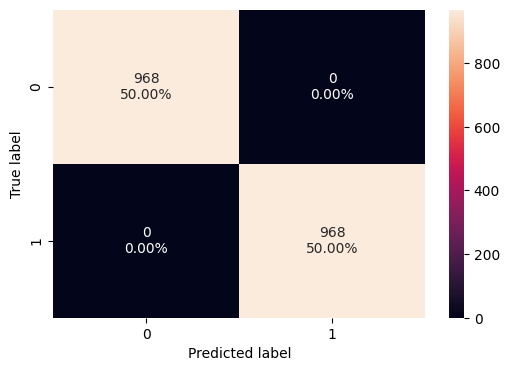

In [ ]:
# Create confusion matrix for training set
confusion_matrix_sklearn(xgboost_under, X_train_under, y_train_under)

* The XGBoost classifer model is overfitting on the under-sampled training set resulting in a Recall score of 100%.

In [ ]:
# Calculate model performance for validation set
xgboost_model_val_under_perf = model_performance_classification_sklearn(xgboost_under, X_val_under, y_val_under)
print("Validation performance \n", xgboost_model_val_under_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.943598  0.957317   0.931751  0.944361


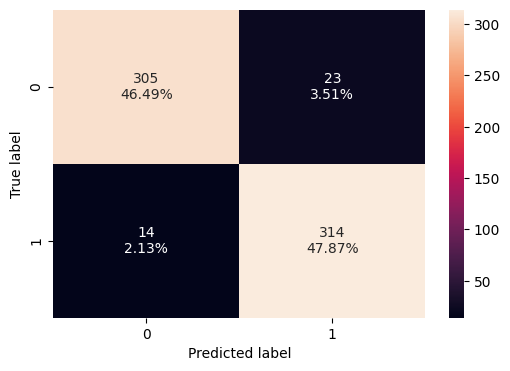

In [ ]:
# Create confusion matrix for validation set
confusion_matrix_sklearn(xgboost_under, X_val_under, y_val_under)

* The XGBoost classifer model is performing very well on the under-sampled validation set resulting in a Recall score of 95.7%.

#### Summary of the six models with under-sampled data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("decisiontree_under", DecisionTreeClassifier(random_state=1)))
models.append(("bagging_under", BaggingClassifier(random_state=1)))
models.append(("randomforest_under", RandomForestClassifier(random_state=1)))
models.append(("adaboost_under", AdaBoostClassifier(random_state=1)))
models.append(("gradientboost_under", GradientBoostingClassifier(random_state=1)))
models.append(("xgboost_under", XGBClassifier(random_state=1)))

print("\n" "Training Performance (Under-Sampled Data):" "\n")
for name, model in models:
    model.fit(X_train_under, y_train_under)
    scores = recall_score(y_train_under, model.predict(X_train_under))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance (Under-Sampled Data):" "\n")

for name, model in models:
    model.fit(X_train_under, y_train_under)
    scores_val_under = recall_score(y_val_under, model.predict(X_val_under))
    print("{}: {}".format(name, scores_val_under))


Training Performance (Under-Sampled Data):

decisiontree_under: 1.0
bagging_under: 0.993801652892562
randomforest_under: 1.0
adaboost_under: 0.9576446280991735
gradientboost_under: 0.987603305785124
xgboost_under: 1.0

Validation Performance (Under-Sampled Data):

decisiontree_under: 0.8780487804878049
bagging_under: 0.9359756097560976
randomforest_under: 0.9695121951219512
adaboost_under: 0.9420731707317073
gradientboost_under: 0.9634146341463414
xgboost_under: 0.9573170731707317


* Using the undersampled data, many of our models continued to overfit the training set, but also performed much better on the valdation set.

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


### HyperparameterTuning

#### Sample Parameter Grids

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Gradient Boost with oversampled data (Tuned)

In [ ]:
# defining model
gradientboost_over_tuned = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV

param_grid = {
              "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1), GradientBoostingClassifier(random_state=1)],
              "n_estimators": np.arange(50,110,25),
              "learning_rate": [0.01,0.1,0.05],
              "subsample":[0.7,0.9],
              "max_features":[0.5,0.7,1]
              }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=gradientboost_over_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

# Set the classifer to the best combination of parameters
gradientboost_over_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data
gradientboost_over_tuned.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9475160571252236:


In [ ]:
# Calculate model performance for training set
gradientboost_model_over_tuned_train_perf = model_performance_classification_sklearn(gradientboost_over_tuned, X_train_over, y_train_over)
print("Training performance \n", gradientboost_model_over_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.935481  0.957118   0.917417  0.936847


In [ ]:
# Calculate model performance for validation set
gradientboost_model_val_over_tuned_perf = model_performance_classification_sklearn(gradientboost_over_tuned, X_val_over, y_val_over)
print("Validation performance \n", gradientboost_model_val_over_tuned_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.933157  0.965842   0.906578  0.935272


* After hyperparameter tuning the Gradient Boosting model using RandomizedSearchCV we reduced overfitting on the over-sampled training set by about 3%.
* Validation Recall score decrease slightly from 97.2% to 96.5%.

#### XG Boost with oversampled data (Tuned)

In [ ]:
# defining model
xgboost_over_tuned = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV

param_grid = {
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
            }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=xgboost_over_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

# Set the classifer to the best combination of parameters
xgboost_over_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data
xgboost_over_tuned.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9857002938295789:


In [ ]:
# Calculate model performance for training set
xgboost_model_over_tuned_train_perf = model_performance_classification_sklearn(xgboost_over_tuned, X_train_over, y_train_over)
print("Training performance \n", xgboost_model_over_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.972195  0.999608   0.947652  0.972937


In [ ]:
# Calculate model performance for validation set
xgboost_model_val_over_tuned_perf = model_performance_classification_sklearn(xgboost_over_tuned, X_val_over, y_val_over)
print("Validation performance \n", xgboost_model_val_over_tuned_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.955241  0.987044   0.928018  0.956621


* After hyperparameter tuning the XGBoost model using RandomizedSearchCV we reduced overfitting on the over-sampled training set by only 0.1%.
* Validation Recall score increased slightly from 97.2% to 98.7%.

#### Random Forest with undersampled data (Tuned)

In [ ]:
# defining model
randomforest_under_tuned = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              "n_estimators": [25, 50, 75, 100, 125, 150],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1),
              "max_depth": [4, 6, 8, 10, None],
              "min_impurity_decrease": [0.001, 0.0025, 0.005]
              }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=randomforest_under_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

# Set the classifer to the best combination of parameters
randomforest_under_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data
randomforest_under_tuned.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 150, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.005, 'max_samples': 0.5, 'max_features': 'sqrt', 'max_depth': 8} with CV score=0.8967523102398376:


In [ ]:
# Calculate model performance for training set
randomforest_model_under_tuned_train_perf = model_performance_classification_sklearn(randomforest_under_tuned, X_train_under,y_train_under)
print("Training performance \n", randomforest_model_under_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.907541  0.910124   0.905447  0.907779


In [ ]:
# Calculate model performance for validation set
randomforest_model_under_tuned_val_perf = model_performance_classification_sklearn(randomforest_under_tuned, X_val_under,y_val_under)
print("Validation performance \n", randomforest_model_under_tuned_val_perf)

Validation performance 
    Accuracy   Recall  Precision        F1
0  0.897866  0.92378   0.878261  0.900446


* After hyperparameter tuning the Random Forest model using RandomizedSearchCV we reduced overfitting on the over-sampled training set significantly by 9%.
* Validation Recall score decrease from 96.9 to 92.3%%.

In [ ]:
# importance of features in the tree building
print (pd.DataFrame(randomforest_under_tuned.feature_importances_, columns = ["Imp"], index = X_train_under.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Total_Trans_Ct            0.241147
Total_Revolving_Bal       0.197172
Total_Trans_Amt           0.168030
Total_Ct_Chng_Q4_Q1       0.125159
Avg_Utilization_Ratio     0.081942
Total_Amt_Chng_Q4_Q1      0.042841
Months_Inactive_12_mon    0.027977
Contacts_Count_12_mon     0.027712
Total_Relationship_Count  0.022244
Credit_Limit              0.019873
Avg_Open_To_Buy           0.016635
Customer_Age              0.010863
Months_on_book            0.004932
Dependent_count           0.003145
Gender_2                  0.001942
Education_Level_4         0.001719
Gender_1                  0.001682
Marital_Status_2          0.001138
Marital_Status_1          0.000944
Card_Category_1           0.000676
Income_Category_3         0.000508
Education_Level_1         0.000418
Education_Level_5         0.000256
Marital_Status_-1         0.000216
Education_Level_3         0.000197
Income_Category_5         0.000183
Income_Category_1         0.000167
Card_Category_4     

In [ ]:
feature_names = X_train_under.columns

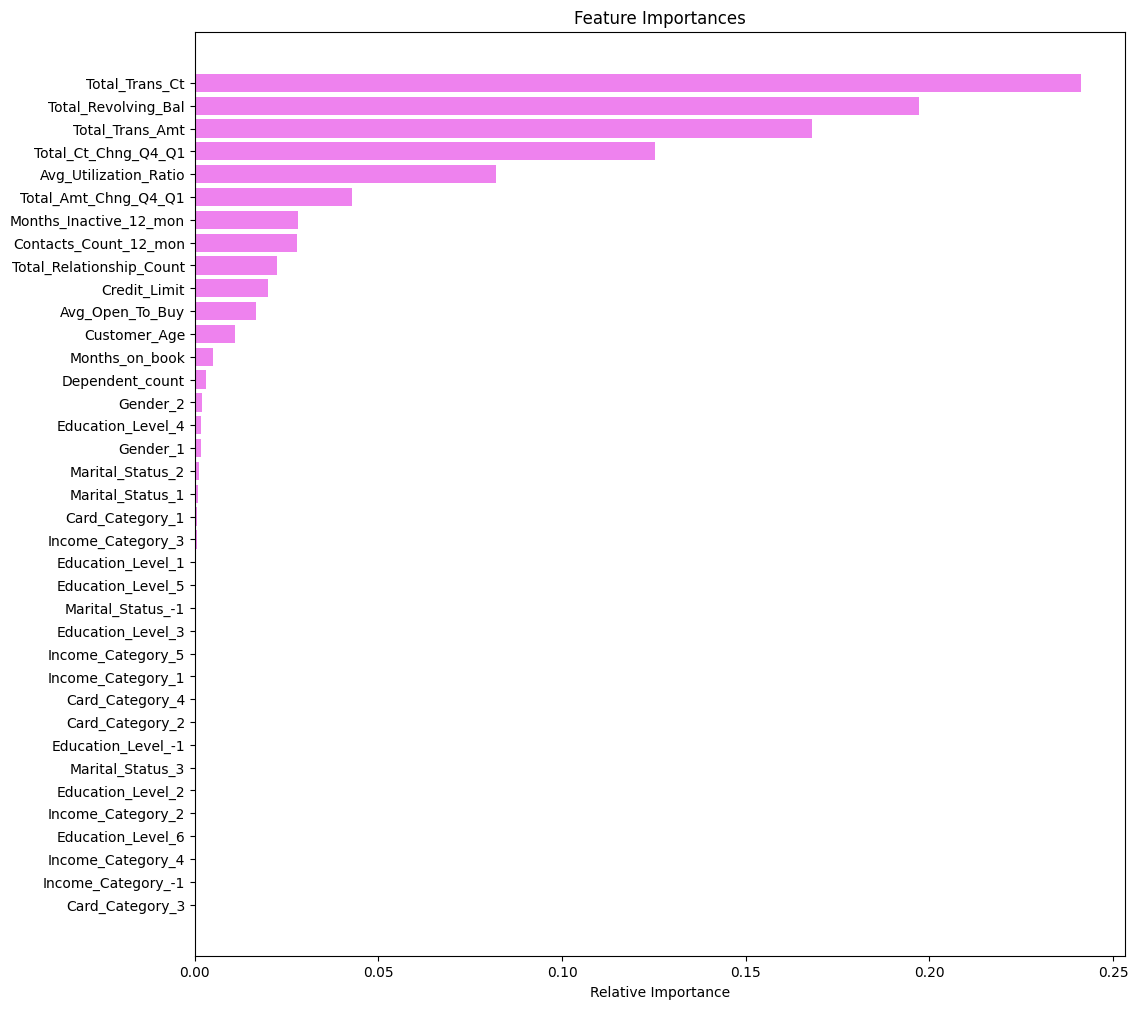

In [ ]:
importances = randomforest_under_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The Random Forest model using under-sampled data tells us that the top five most important features it has discovered are:
  * Total_Trans_Ct
  * Total_Revolving_Bal
  * Total_Trans_Amt
  * Total_Ct_Chng_Q4_Q1
  * Avg_Utilization_Ratio

## Model Comparison and Final Model Selection

### Test set final performance (Tuned models only)

#### Model 1 - Random Forest Model (Tuned)

In [ ]:
# Calculate model performance for test set
randomforest_model_under_tuned_test_perf = model_performance_classification_sklearn(randomforest_under_tuned, X_test, y_test)
print("Test performance \n", randomforest_model_under_tuned_test_perf)

Test performance 
    Accuracy   Recall  Precision        F1
0  0.885489  0.92145   0.596869  0.724466


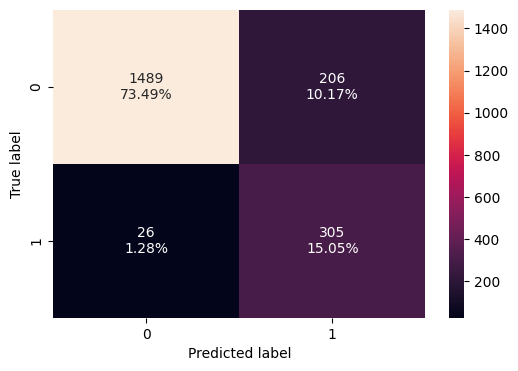

In [ ]:
# Create confusion matrix for test set
confusion_matrix_sklearn(randomforest_under_tuned, X_test, y_test)

* The tuned random forest classifier model (under-sampled data) is performing very well on the test set resulting in a Recall score of 92.1%.
* The tuned random forest classifier model (under-sampled data) on the training set resulted in a Recall score of 91%.
*The tuned random forest classifier model (under-sampled data) on the validation set resulted in a Recall score of 92.3%.

#### Model 2 - Gradient Boosting Model (Tuned)

In [ ]:
# Calculate model performance for test set
gradientboost_model_over_tuned_test_perf = model_performance_classification_sklearn(gradientboost_over_tuned, X_test, y_test)
print("Test performance \n", gradientboost_model_over_tuned_test_perf)

Test performance 
    Accuracy   Recall  Precision        F1
0  0.918559  0.92145   0.686937  0.787097


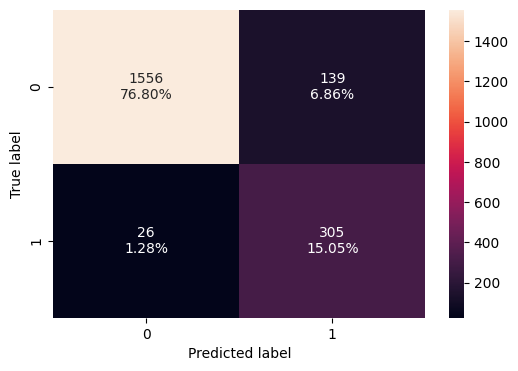

In [ ]:
# Create confusion matrix for test set
confusion_matrix_sklearn(gradientboost_over_tuned, X_test, y_test)

* The tuned gradient boosting classifier model (over-sampled data) s performing well on the test set resulting in a Recall score of 92.1%.
* The tuned gradient boosting classifier model (over-sampled data) on the training set resulted in a Recall score of 95.7%.
* The tuned gradient boosting classifier model (over-sampled data) on the validation set resulted in a Recall score of 96.5%.

#### Model 3 - XGBoost Model (Tuned)

In [ ]:
# Calculate model performance for test set
xgboost_model_over_tuned_test_perf = model_performance_classification_sklearn(xgboost_over_tuned, X_test, y_test)
print("Test performance \n", xgboost_model_over_tuned_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.930405  0.969789   0.710177  0.819923


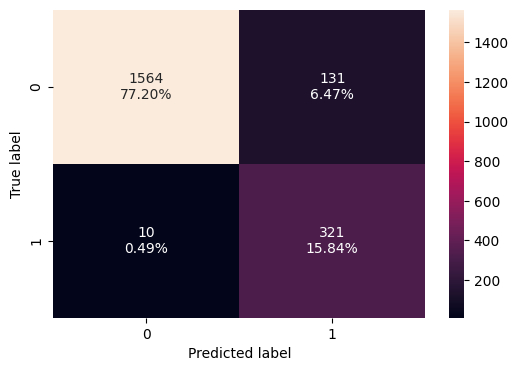

In [ ]:
# Create confusion matrix for test set
confusion_matrix_sklearn(xgboost_over_tuned, X_test, y_test)

* **The tuned XGBoost classifer model (over-sampled data) is is the best performing model here, peforming well on the test set resulting in a Recall score of 96.9%.**
* The tuned XGBoost classifier model (over-sampled data) on the training set resulted in a Recall score of 99.9%.
* The tuned XGBoost classifier model (over-sampled data) on the validation set resulted in a Recall score of 98.7%.

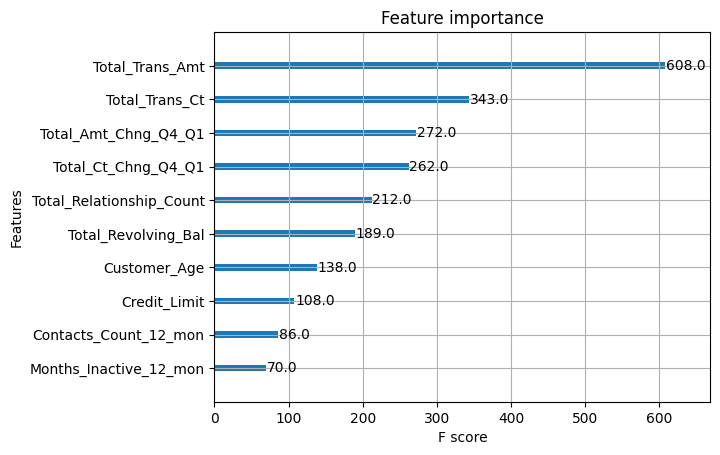

In [ ]:
# Plotting the feature importance
plot_importance(xgboost_over_tuned, max_num_features=10)
plt.show()

* The top five most important features from the final, best performing XGBoost tuned model (on over-sampled data) are:
  * Total_Trans_Amt
  * Total_Trans_Ct
  * Total_Amt_Chng_Q4_Q1
  * Total_Ct_Chng_Q4_Q1
  * Total_Relationship_Count

# Business Insights and Conclusions

### Insights:

* 16% of the dataset contained attrited customers (1627/10127), which is below the 25-30% attrition rate (for non-binding contracts) but above the 5-7% attrition rate (for annual contracts) based on a Qualtrics report. ^1

* Out of the 18 models created, the following top 3 were selected for hyperparameter tuning:
 * Gradient Boost (over-sampled data)
 * XGBoost (over-sampled data)
 * Random Forest (under-sampled data)

  *gradientboost_over_tuned* -
  Training recall = 95.7%;
  Validation recall = 96.5%;
  Test recall =  92.1%

  *xgboost_over_tuned* -
  Training recall 99.9%;
  Validation recall = 98.7%;
  Test recall = 96.9%

  *randomforest_over_tuned* -
  Training recall = 91%;
  Validation recall = 92.3%;
  Test recall = 92.1%

* After tuning the above 3 models, the best performing one on the subsequent test set is the following:
 * **xgboost_over_tuned** - Recall score on test set: 96.9%

* The top five most important features from the final, best performing XGBoost tuned model (on over-sampled data) are:
  * Total_Trans_Amt
  * Total_Trans_Ct
  * Total_Amt_Chng_Q4_Q1
  * Total_Ct_Chng_Q4_Q1
  * Total_Relationship_Count

### Conclusions:

* Based on the results of the best performing model, XGBoost, the top five features to focus on in identifying customers likely to attrite, from most to least important:

   1. **Total_Trans_Amt** - Total Transaction Amounts (Last 12 months).  Attrited customers had a significantly lower (~33%) transaction amount than existing customers.

   2. **Total_Trans_Ct** - Total Transaction Count (Last 12 months).  Attrited customers had significantly fewer transactions (~33%) than existing customers.

   3. **Total_Amt_Chng_Q4_Q1** - Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter (last 12 months). Attrited customers had a lower change (ratio) in transaction amount from Q4 to Q1 than existing customers.

   4. **Total_Ct_Chng_Q4_Q1** - Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter (last 12 months).  Attrited customers had a lower change (ratio) in total transaction count form Q4 to Q1 than existing customers.

   5. **Total_Relationship_Count** - Total number of products held by the customer. Attrited customers had less products than existing customers.

*  Poor service is the #1 reason for bank customer churn.   Improved customer service reduces attrition.  Attrition rates as high as 25-30% are not uncommon. ^1)

* The "key causes of customer churn are poor customer support, buggy product, wrong product-market fit, bad user experience, poor onboarding process, high pricing, and long time-to-value." ^2

*  According to a Visa Consulting & Analytics report on *Investing in Cardholer Retention*, credit card companies can proactively identify customers at risk of attrition by doing the following things ^3:
  * Address areas of dissatisfaction and engage in a proactive retention strategies to identify those likely to leave and prevent attrition from happening.
  * Deploy a retention strategy that reaches out to customers who are dormant (to increase customer engagement), and reach out to those that are showing significant trends (attrition indicators) in their account balances.
  * Maintain customer loyalty by proactively reaching out them, resolving their concerns and giving them what they want (more value).

### References

  ^1: https://www.qualtrics.com/blog/customer-churn-banking/
  
  ^2: https://userpilot.com/blog/customer-attrition/
  
  ^3: https://eg.visamiddleeast.com/content/dam/VCOM/regional/cemea/generic-cemea/services/visa-consulting-analytics/insights/11176-vca-investing-in-cardholder-retention-paper.pdf

***